<a href="https://colab.research.google.com/github/Carlys222/Unidad-5/blob/main/Problemario_Unidad_5_Parte_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemario de bloqueo

##Problema 1:
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**<br>
a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?  
c) ¿Hay algún atomizador mejor? Argumente su respuesta.  
d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.  
e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.

#a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.

#### Hipotesis

El objetivo de este experimento es comparar la efectividad de tres marcas de atomizadores para matar moscas, utilizando un diseño que considera tanto la variación entre productos como la posible variación entre los días en que se realizaron las pruebas. Se parte de la suposición de que, si todos los atomizadores fueran igualmente efectivos, entonces las diferencias en los porcentajes de moscas muertas serían mínimas y atribuibles únicamente a la variabilidad normal del proceso experimental.

Además, como las pruebas se realizaron en días distintos, se considera que estos días pueden haber influido en los resultados. Por ello, también se quiere analizar si el día de la aplicación tuvo algún efecto significativo sobre la cantidad de moscas muertas, más allá del producto utilizado.

Modelo estadistico

In [2]:
# Karla Michel Jimenez ortiz
import pandas as pd
from io import StringIO

data = '''
Marca,Replica,Resultado
1,1,72
2,1,55
3,1,64
1,2,65
2,2,59
3,2,74
1,3,67
2,3,68
3,3,61
1,4,75
2,4,70
3,4,58
1,5,62
2,5,53
3,5,51
1,6,73
2,6,50
3,6,69
'''

df = pd.read_csv(StringIO(data))
df


,Marca,Replica,Resultado
0,1,1,72
1,2,1,55
2,3,1,64
3,1,2,65
4,2,2,59
5,3,2,74
6,1,3,67
7,2,3,68
8,3,3,61
9,1,4,75


In [3]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Replica'    # La variable que no me interesa comparar
interes = 'Marca'      # La variable que me interesa comparar
respuesta = 'Resultado' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
                sum_sq    df         F    PR(>F)
C(Marca)    296.333333   2.0  2.880752  0.102804
C(Replica)  281.333333   5.0  1.093973  0.420718
Residual    514.333333  10.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


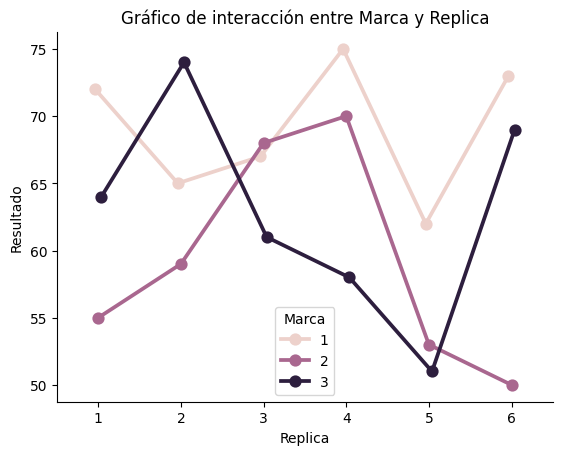

In [4]:
# KARLA MICHEL JIMENEZ ORTIZ
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



### b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?


Se realizó un análisis de varianza considerando un diseño en bloques completamente al azar, donde las marcas son los tratamientos y los días las unidades de bloqueo. El resultado muestra un valor de p = 0.103 para el efecto de la marca.

Como el valor de p es mayor a 0.05, no se encontró evidencia estadísticamente significativa para afirmar que exista una diferencia en la efectividad promedio entre las marcas de atomizadores, por ello se concluye que "NO EXISTE UNA DIFERENCIA SIGNIFICATIVA".

###c) ¿Hay algún atomizador mejor? Argumente su respuesta.

Aunque los resultados muestran algunas diferencias en los promedios (por ejemplo, la Marca 1 tiene valores más altos en general), estas diferencias no son estadísticamente significativas. Esto significa que no se puede afirmar con seguridad que una marca sea mejor que las demás basándose únicamente en los datos obtenidos, por eso se concluye que debido a que no hay una diferencia significativa entre las marcas no puede haber un atomizador mejor.


### d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.


El análisis de varianza también evaluó el efecto del día en que se hizo cada réplica. El valor de p = 0.421 indica que no hay evidencia estadísticamente significativa para concluir que los días hayan influido en la efectividad de los atomizadores.

Interpretación:
Podemos asumir que la variabilidad entre días no tuvo un impacto considerable en los resultados del experimento.



### e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.

### Supuesto de Normalidad Test de Shapiro

In [5]:
# Prueba de Shapiro
# KARLA MICHEL JIMENEZ ORTIZ
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Marca'] == 1]['Resultado'], "Marca 1", nivel_de_significancia)
prueba_shapiro(df[df['Marca'] == 2]['Resultado'], "Marca 2", nivel_de_significancia)
prueba_shapiro(df[df['Marca'] == 3]['Resultado'], "Marca 3", nivel_de_significancia)





Prueba de Shapiro-Wilk para Marca 1:
Estadístico: 0.9385
Valor p: 0.6471
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Marca 2:
Estadístico: 0.9066
Valor p: 0.4145
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Marca 3:
Estadístico: 0.9947
Valor p: 0.9975
Interpretación: Los datos tienen una distribución normal.


Normalidad de los residuos:
Se aplicó la prueba de Shapiro-Wilk, obteniendo un valor de valor p es mayor a 0.05, se concluye que los residuos siguen una distribución normal.

#### Supuesto de homoscedasticidad: test de barlett

In [6]:
# KARLA MICHEL JIMENEZ ORTIZ
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Marca'] == 1]['Resultado'],
    df[df['Marca'] == 2]['Resultado'],
    df[df['Marca'] == 3]['Resultado'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 2.563987653883703
Valor p: 0.2774834944728171
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


##Problema 2:
En una empresa lechera se tienen varios silos para almacenar leche (cisternas de 60 000 L). Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello, durante cinco días se decide registrar la temperatura a cierta hora crítica. Obviamente la temperatura de un día a otro es una fuente de variabilidad que podría impactar la variabilidad total.

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 4.0   | 4.0    | 5.0       | 0.5    | 3.0     |
| B    | 5.0   | 6.0    | 2.0       | 4.0    | 4.0     |
| C    | 4.5   | 4.0    | 3.5       | 2.0    | 3.0     |
| D    | 2.5   | 4.0    | 6.5       | 4.5    | 4.0     |
| E    | 4.0   | 4.0    | 3.5       | 2.0    | 4.0     |

**Preguntas:**<br>
a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?  
b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
c) ¿Hay diferencia entre los silos?  
d) ¿La temperatura de un día a otro es diferente?  
e) Revise residuos, ¿hay algún problema evidente?


## a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?

##Factor de tratamiento: El silo. Se quiere saber si hay diferencias en la temperatura entre los distintos silos.

##Factor de bloqueo: El día. Como la temperatura puede variar naturalmente de un día a otro, se utiliza como bloque para reducir esa variabilidad en el análisis.

In [7]:
# KARLA MICHEL JIMENEZ ORTIZ
import pandas as pd
from io import StringIO
data = '''
Silo,Dia,Temperatura
A,Lunes,4.0
A,Martes,4.0
A,Miércoles,5.0
A,Jueves,0.5
A,Viernes,3.0
B,Lunes,5.0
B,Martes,6.0
B,Miércoles,2.0
B,Jueves,4.0
B,Viernes,4.0
C,Lunes,4.5
C,Martes,4.0
C,Miércoles,3.5
C,Jueves,2.0
C,Viernes,3.0
D,Lunes,2.5
D,Martes,4.0
D,Miércoles,6.5
D,Jueves,4.5
D,Viernes,4.0
E,Lunes,4.0
E,Martes,4.0
E,Miércoles,3.5
E,Jueves,2.0
E,Viernes,4.0
'''
df = pd.read_csv(StringIO(data))
df

,Silo,Dia,Temperatura
0,A,Lunes,4.0
1,A,Martes,4.0
2,A,Miércoles,5.0
3,A,Jueves,0.5
4,A,Viernes,3.0
5,B,Lunes,5.0
6,B,Martes,6.0
7,B,Miércoles,2.0
8,B,Jueves,4.0
9,B,Viernes,4.0


## b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.

## Hipotesis

El objetivo de este experimento es evaluar si los distintos silos de almacenamiento presentan diferencias en la temperatura a la que conservan la leche. Esta información es importante, ya que una temperatura inadecuada podría afectar la calidad del producto. Para ello, se midió la temperatura en cada silo durante cinco días consecutivos, siempre en el mismo horario.

Además, como las condiciones ambientales pueden variar de un día a otro, se considera que el día de la medición también puede influir en los resultados. Por eso, el análisis contempla tanto la comparación entre silos como la posible variación en temperatura entre los distintos días.

## Modelo Estadistico

In [8]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Dia'    # La variable que no me interesa comparar
interes = 'Silo'      # La variable que me interesa comparar
respuesta = 'Temperatura' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")



Resultados del ANOVA:
          sum_sq    df         F    PR(>F)
C(Silo)     4.46   4.0  0.690402  0.609212
C(Dia)      9.76   4.0  1.510836  0.246022
Residual   25.84  16.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


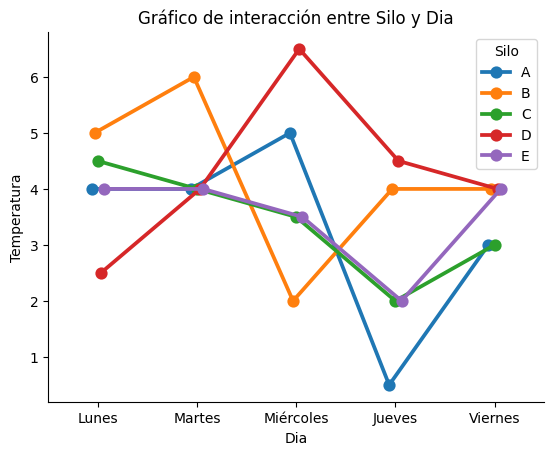

In [9]:
# KARLA MICHEL JIMENEZ ORTIZ
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()


## c) ¿Hay diferencia entre los silos?


El análisis de varianza mostró un valor de p = 0.609 para el efecto del silo.

Interpretación:
Como el valor de p es mayor a 0.05, no se encontró evidencia estadísticamente significativa para afirmar que existan diferencias entre los silos en cuanto a temperatura de almacenamiento, por lo que se concluye que No hay diferencia significativa entre los silos.

##d) ¿La temperatura de un día a otro es diferente?

El valor de p asociado al efecto del día fue de 0.246.

Interpretación:
Tampoco se encontró evidencia significativa para afirmar que la temperatura varía de manera sistemática de un día a otro. Esto sugiere que las variaciones diarias en la temperatura no son suficientes para ser concideradas una fuente importante de variabilidad en el caso.

##e) Revise residuos, ¿hay algún problema evidente?

In [10]:
# Prueba de Shapiro
# KARLA MICHEL JIMENEZ ORTIZ
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Silo'] == "A"]['Temperatura'], "Silo A", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "B"]['Temperatura'], "Silo B", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "C"]['Temperatura'], "Silo C", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "D"]['Temperatura'], "Silo D", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "E"]['Temperatura'], "Silo E", nivel_de_significancia)


Prueba de Shapiro-Wilk para Silo A:
Estadístico: 0.8854
Valor p: 0.3344
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo B:
Estadístico: 0.9556
Valor p: 0.7773
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo C:
Estadístico: 0.9787
Valor p: 0.9276
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo D:
Estadístico: 0.9306
Valor p: 0.6006
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo E:
Estadístico: 0.7008
Valor p: 0.0098
Interpretación: Los datos no tienen una distribución normal.


In [11]:
# KARLA MICHEL JIMENEZ ORTIZ
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Silo'] == "A"]['Temperatura'],
    df[df['Silo'] == "B"]['Temperatura'],
    df[df['Silo'] == "C"]['Temperatura'],
    df[df['Silo'] == "D"]['Temperatura'],
    df[df['Silo'] == "E"]['Temperatura'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 2.3581336401556414
Valor p: 0.6702060348913189
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


##No se observan problemas evidentes con los residuos. Se cumple la normalidad y no hay señales de heterocedasticidad ni de relaciones no lineales no modeladas. El modelo es adecuado.










## Problema 3
Se diseñó un experimento para estudiar el rendimiento de cuatro detergentes. Las siguientes lecturas de “blancura” se obtuvieron con un equipo especial diseñado para 12 cargas de lavado, distribuidas en tres modelos de lavadoras:

| Detergente | Lavadora 1 | Lavadora 2 | Lavadora 3 |
|------------|------------|------------|------------|
| A          | 45         | 43         | 51         |
| B          | 47         | 44         | 52         |
| C          | 50         | 49         | 57         |
| D          | 42         | 37         | 49         |

**Preguntas:**<br>
a) Señale el nombre del diseño experimental utilizado.  
b) Formule la hipótesis que se quiere probar en este problema.  
c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.  



##a) Señale el nombre del diseño experimental utilizado.


Este experimento tiene 4 detergentes (factor principal) y 3 modelos de lavadoras (bloques o factor de bloqueo).

Diseño: Diseño en Bloques Completamente Al Azar (DBCA) o Diseño de Bloques Completos, donde los detergentes son tratamientos y las lavadoras son bloques (ya que hay 3 modelos y cada modelo tiene una observación para cada detergente).

##b) Formule la hipótesis que se quiere probar en este problema.


En este experimento se plantea que el rendimiento de los cuatro detergentes evaluados, medido en términos de la blancura obtenida después del lavado, es igual en promedio para todos los detergentes. Es decir, se asume inicialmente que no existen diferencias significativas en la efectividad de cada detergente para producir blancura. El objetivo es comprobar si esta igualdad en el rendimiento promedio se mantiene o si, por el contrario, alguno o algunos detergentes presentan un efecto diferente, mostrando así un rendimiento superior o inferior en comparación con los demás. Este análisis es fundamental para determinar si el tipo de detergente influye en la calidad del lavado en términos de blancura, independientemente del modelo de lavadora utilizado.

## c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.

In [12]:
# KARLA MICHEL JIMENEZ ORTIZ
import pandas as pd
from io import StringIO
data = '''
Detergente,Lavadora,Blancura
A,1,45
A,2,43
A,3,51
B,1,47
B,2,44
B,3,52
C,1,50
C,2,49
C,3,57
D,1,42
D,2,37
D,3,49
'''
df = pd.read_csv(StringIO(data))
df

,Detergente,Lavadora,Blancura
0,A,1,45
1,A,2,43
2,A,3,51
3,B,1,47
4,B,2,44
5,B,3,52
6,C,1,50
7,C,2,49
8,C,3,57
9,D,1,42


In [13]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Lavadora'    # La variable que no me interesa comparar
interes = 'Detergente'      # La variable que me interesa comparar
respuesta = 'Blancura' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")



Resultados del ANOVA:
                   sum_sq   df          F    PR(>F)
C(Detergente)  133.666667  3.0  34.127660  0.000363
C(Lavadora)    170.166667  2.0  65.170213  0.000085
Residual         7.833333  6.0        NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


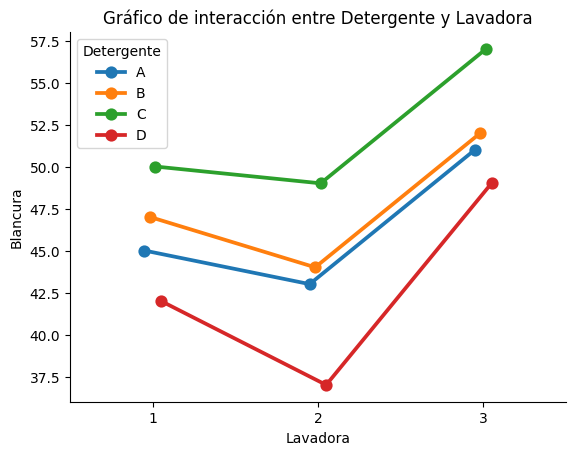

In [14]:
# KARLA MICHEL JIMENEZ ORTIZ
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()


##Tukey

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333 0.9847 -11.0002 13.6669  False
     A      C   5.6667  0.495  -6.6669 18.0002  False
     A      D  -3.6667  0.779 -16.0002  8.6669  False
     B      C   4.3333 0.6855  -8.0002 16.6669  False
     B      D     -5.0 0.5887 -17.3336  7.3336  False
     C      D  -9.3333 0.1495 -21.6669  3.0002  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

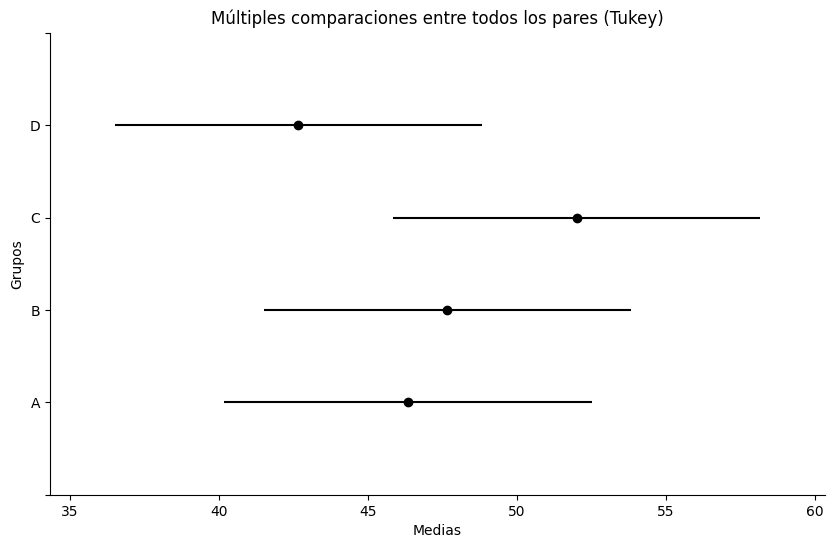

In [15]:
#KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Blancura'], groups=df['Detergente'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## Supuesto de normalidad Test de Shapiro

In [16]:
# Prueba de Shapiro
# KARLA MICHEL JIMENEZ ORTIZ
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Detergente'] == "A"]['Blancura'], "Detergente A", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == "B"]['Blancura'], "Detergente B", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == "C"]['Blancura'], "Detergente C", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == "D"]['Blancura'], "Detergente D", nivel_de_significancia)



Prueba de Shapiro-Wilk para Detergente A:
Estadístico: 0.9231
Valor p: 0.4633
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Detergente B:
Estadístico: 0.9796
Valor p: 0.7262
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Detergente C:
Estadístico: 0.8421
Valor p: 0.2196
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Detergente D:
Estadístico: 0.9908
Valor p: 0.8168
Interpretación: Los datos tienen una distribución normal.


## Supuesto de homoscedasticidad Test de Barlett

In [17]:
# KARLA MICHEL JIMENEZ ORTIZ
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Detergente'] == "A"]['Blancura'],
    df[df['Detergente'] == "B"]['Blancura'],
    df[df['Detergente'] == "C"]['Blancura'],
    df[df['Detergente'] == "D"]['Blancura'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 2.766766945554789
Valor p: 0.4289999281632636
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


# CONCLUSIONES
Con base en los resultados del análisis estadístico, se concluye que el tipo de detergente utilizado sí influye significativamente en el nivel de blancura alcanzado durante el lavado. La variación observada entre los promedios de blancura no puede atribuirse al azar, lo que indica que al menos uno de los detergentes tiene un comportamiento distinto respecto a los demás. Además, se detectó que el modelo de lavadora también tiene un impacto importante en el resultado, lo que justifica su inclusión como factor de control en el diseño experimental. Estos hallazgos permiten recomendar un análisis más detallado entre pares de detergentes para identificar cuál o cuáles generan una blancura superior.

## Problema 4
Con respecto al problema anterior:<br>
a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.  
b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.  
c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

#a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.



##a) Señale el nombre del diseño experimental utilizado.


Diseño experimental considerado:
Si ignoramos las lavadoras, estamos tratando el experimento como un diseño completamente al azar (DCA), donde el único factor considerado es el tipo de detergente.

##b) Formule la hipótesis que se quiere probar en este problema.


Se considera que los cuatro detergentes evaluados ofrecen un rendimiento promedio similar en términos de blancura obtenida en la ropa. En este análisis, se asume que cualquier variación en los resultados entre detergentes es producto del azar o de variabilidad natural en el proceso de lavado, ya que no se está considerando el efecto del modelo de lavadora. El objetivo es determinar si el tipo de detergente, por sí solo, tiene un impacto significativo sobre el nivel de blancura, o si todos los detergentes se comportan de manera equivalente al ser evaluados en conjunto.

##c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.

In [18]:
# KARLA MICHEL JIMENEZ ORTIZ
import pandas as pd
from io import StringIO
data = '''
Detergente,Blancura
A,45
A,43
A,51
B,47
B,44
B,52
C,50
C,49
C,57
D,42
D,37
D,49
'''
df = pd.read_csv(StringIO(data))
df

,Detergente,Blancura
0,A,45
1,A,43
2,A,51
3,B,47
4,B,44
5,B,52
6,C,50
7,C,49
8,C,57
9,D,42


In [19]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

interes = 'Detergente'      # La variable que me interesa comparar
respuesta = 'Blancura' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")




Resultados del ANOVA:
                   sum_sq   df         F   PR(>F)
C(Detergente)  133.666667  3.0  2.002497  0.19229
Residual       178.000000  8.0       NaN      NaN

Conclusión: No hay diferencias significativas entre los tratamientos.


# CONCLUSIONES
El análisis de varianza realizado bajo un diseño completamente al azar, donde solo se consideró el tipo de detergente como factor principal, arrojó un valor de F = 2.00 con un valor de p = 0.1923. Dado que este valor de p es mayor que el nivel de significancia comúnmente utilizado (α = 0.05), no se dispone de evidencia estadística suficiente para afirmar que existen diferencias significativas entre los detergentes en cuanto a su efecto sobre la blancura de la ropa.

Esto implica que, desde el punto de vista estadístico y bajo este enfoque, todos los detergentes pueden considerarse igualmente efectivos, ya que las diferencias observadas entre sus promedios podrían explicarse por variaciones aleatorias inherentes al proceso de lavado. En otras palabras, el tipo de detergente no parece tener un efecto claro o consistente sobre el resultado cuando se ignora el modelo de lavadora utilizado.

## b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.


Sí, hay una diferencia importante entre ambas conclusiones.

Cuando se considera el efecto de las lavadoras (diseño en bloques), el análisis muestra que sí hay diferencias significativas entre los detergentes, lo cual sugiere que al menos uno de ellos tiene un rendimiento distinto en términos de blancura.

En cambio, al no considerar las lavadoras (diseño completamente al azar), se concluye que no hay diferencias significativas entre los detergentes. Esto ocurre porque se ignora una fuente de variación relevante, y al hacerlo, la variabilidad entre lavadoras se suma al error experimental, reduciendo la capacidad del análisis para detectar diferencias reales.

Por lo tanto, las conclusiones cambian dependiendo de si se controla o no el efecto del modelo de lavadora.

## c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

Me quedo con las conclusiones obtenidas al considerar el efecto de las lavadoras, es decir, con el análisis basado en el diseño en bloques (DBCA).

Esto se debe a que ese análisis toma en cuenta una fuente real y comprobable de variación, como lo es el modelo de lavadora. Al incluirlo como bloque, se controla su influencia en los resultados y se obtiene un análisis más preciso, confiable y representativo de la realidad del experimento.

Ignorar el efecto de las lavadoras aumenta el error y puede ocultar diferencias verdaderas entre los detergentes. Por lo tanto, las conclusiones del análisis con bloques son más completas y reflejan mejor el comportamiento real de los tratamientos.

## Problema 5
Una de las variables críticas en el proceso de ensamble del brazo lector de un disco duro es el ángulo que este forma con el cuerpo principal de la cabeza lectora. Se corre un experimento con el objetivo de comparar dos equipos que miden dicho ángulo en unidades de radianes. Se decide utilizar como factor de bloque a los operadores de los equipos. Los resultados se muestran en la siguiente tabla:

| Operador | Equipo 1                                         | Equipo 2                                         |
|----------|--------------------------------------------------|--------------------------------------------------|
| 1        | 1.328, 0.985, 1.316, 1.553, 1.310               | 1.273, 0.985, 1.134, 1.412, 0.917               |
|          | 1.113, 1.057, 1.144, 1.485, 1.386               | 0.789, 0.671, 0.554, 1.386, 1.289               |
| 2        | 1.269, 1.268, 1.091, 1.195, 1.380               | 1.036, 0.783, 1.108, 1.129, 1.132               |
|          | 1.093, 0.984, 1.087, 1.482, 1.442               | 0.201, 0.900, 0.916, 1.434, 1.223               |
| 3        | 1.440, 1.079, 1.389, 1.611, 1.445               | 1.454, 1.063, 1.219, 1.602, 1.583               |
|          | 1.150, 1.190, 1.247, 1.617, 1.574               | 1.018, 1.050, 0.997, 1.538, 1.478               |

### Preguntas y ejercicios:
a) Plantee el modelo y las hipótesis más adecuadas al problema.  
b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.  
c) ¿Existen diferencias entre los operadores?  
d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.  
e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.


##a) Plantee el modelo y las hipótesis más adecuadas al problema.


Modelo estadístico:

Dado que se comparan dos equipos (factor principal) y los operadores se consideran como bloques, el modelo es un Diseño en Bloques Completamente al Azar (DBCA), con un factor fijo (Equipo) y bloque fijo (Operador).

## Hipotesis
El experimento busca comparar dos equipos que miden un ángulo crítico, considerando que las mediciones son realizadas por diferentes operadores. Se espera que ambos equipos midan el ángulo con precisión similar, por lo que se analiza si las diferencias en las mediciones se deben al equipo o a la variabilidad entre operadores. Los operadores se incluyen como factor de bloqueo para controlar su posible influencia y mejorar la precisión del análisis. En resumen, se pretende evaluar si el equipo afecta las mediciones y si los operadores generan variaciones significativas en los resultados.

##b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.


In [20]:
# KARLA MICHEL JIMENEZ ORTIZ
import pandas as pd
from io import StringIO
data = '''
Equipo,Operador,Medicion
1,1,1.328
1,1,0.985
1,1,1.316
1,1,1.553
1,1,1.310
1,1,1.113
1,1,1.057
1,1,1.144
1,1,1.485
1,1,1.386
1,2,1.269
1,2,1.268
1,2,1.091
1,2,1.195
1,2,1.380
1,2,1.036
1,2,0.783
1,2,1.108
1,2,1.129
1,2,1.132
1,3,1.440
1,3,1.079
1,3,1.389
1,3,1.611
1,3,1.445
1,3,1.150
1,3,1.190
1,3,1.247
1,3,1.617
1,3,1.574
2,1,1.273
2,1,0.985
2,1,1.134
2,1,1.412
2,1,0.917
2,1,0.789
2,1,0.671
2,1,0.554
2,1,1.386
2,1,1.289
2,2,1.036
2,2,0.783
2,2,1.108
2,2,1.129
2,2,1.132
2,2,0.201
2,2,0.900
2,2,0.916
2,2,1.434
2,2,1.223
2,3,1.454
2,3,1.063
2,3,1.219
2,3,1.602
2,3,1.583
2,3,1.018
2,3,1.050
2,3,0.997
2,3,1.538
2,3,1.478
'''
df = pd.read_csv(StringIO(data))
df

,Equipo,Operador,Medicion
0,1,1,1.328
1,1,1,0.985
2,1,1,1.316
3,1,1,1.553
4,1,1,1.310
5,1,1,1.113
6,1,1,1.057
7,1,1,1.144
8,1,1,1.485
9,1,1,1.386


In [21]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Operador'    # La variable que no me interesa comparar
interes = 'Equipo'      # La variable que me interesa comparar
respuesta = 'Medicion' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")



Resultados del ANOVA:
               sum_sq    df         F    PR(>F)
C(Equipo)    0.342922   1.0  5.711701  0.020242
C(Operador)  0.781471   2.0  6.508092  0.002875
Residual     3.362153  56.0       NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


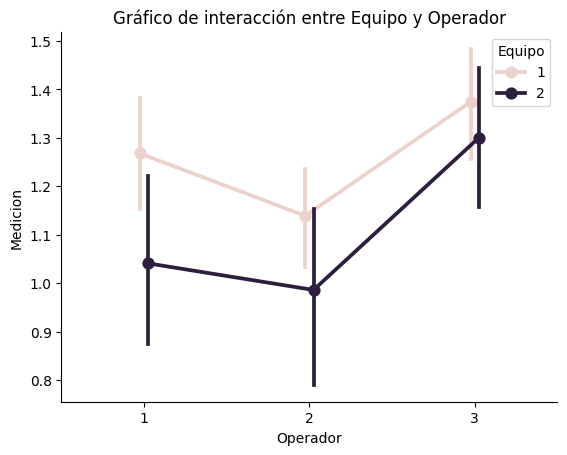

In [22]:

# KARLA MICHEL JIMENEZ ORTIZ
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

##ARGUMENTO ESTADISTICO
El análisis de varianza realizado muestra que tanto el factor Equipo como el factor Operador tienen un efecto significativo en las mediciones del ángulo crítico del brazo lector del disco duro. En específico, el valor de
𝑝
=
0.0202
p=0.0202 asociado al factor Equipo indica que los dos equipos utilizados no miden el ángulo con el mismo promedio, por lo que hay diferencias estadísticamente significativas en su rendimiento o precisión. Esto puede deberse a diferencias en la calibración, sensibilidad o tecnología de medición entre los equipos.

Por otro lado, el valor de
𝑝
=
0.0029
p=0.0029 para el factor Operador revela que las mediciones también varían significativamente dependiendo del operador que las realiza. Esto sugiere que existen diferencias en la forma en que los operadores manipulan el equipo o interpretan las mediciones, lo que añade variabilidad al proceso. Dado que el operador es un factor de bloqueo, su efecto debe ser controlado para mejorar la precisión del experimento y evitar que esta fuente de variabilidad interfiera con la evaluación del equipo.

En conjunto, estos resultados indican que tanto la elección del equipo como el operador que realiza la medición son factores críticos que afectan la calidad y consistencia de las mediciones del ángulo. Por lo tanto, para obtener resultados más confiables y reproducibles, se recomienda:

Realizar una calibración adecuada y mantenimiento regular de los equipos.

Implementar procedimientos estandarizados y capacitación para los operadores, asegurando un manejo consistente de los instrumentos.

De esta manera, se puede minimizar la variabilidad debida a estos factores y mejorar la calidad del control en el proceso de ensamble del brazo lector.

##c) ¿Existen diferencias entre los operadores?


Según los resultados del ANOVA, el factor Operador tiene un valor
𝐹
=
6.51
F=6.51 con un
𝑝
=
0.0029
p=0.0029, lo que indica que sí existen diferencias significativas entre los operadores. Esto significa que los operadores no son intercambiables y que cada uno puede influir de manera diferente en las mediciones del ángulo. Estas diferencias podrían deberse a la técnica, experiencia o interpretación individual al usar los equipos.



##d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.


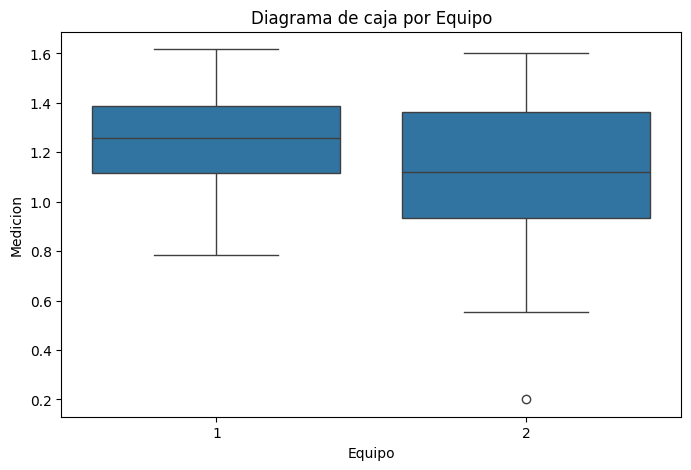

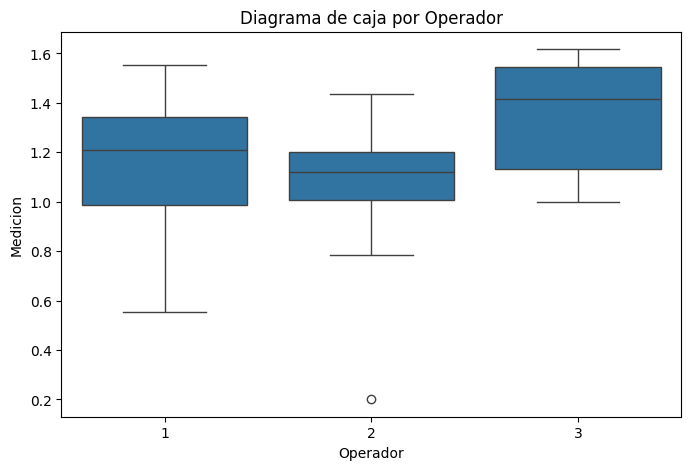

In [23]:
# KARLA MICHEL JIMENEZ ORTIZ
import seaborn as sns
import matplotlib.pyplot as plt

# Diagrama de caja por equipo
plt.figure(figsize=(8,5))
sns.boxplot(x='Equipo', y='Medicion', data=df)
plt.title('Diagrama de caja por Equipo')
plt.show()

# Diagrama de caja por operador
plt.figure(figsize=(8,5))
sns.boxplot(x='Operador', y='Medicion', data=df)
plt.title('Diagrama de caja por Operador')
plt.show()


<ipython-input-24-7e2e7785bb53>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Equipo', y='Medicion', data=df, capsize=0.1, ci='sd', join=False)
<ipython-input-24-7e2e7785bb53>:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Equipo', y='Medicion', data=df, capsize=0.1, ci='sd', join=False)


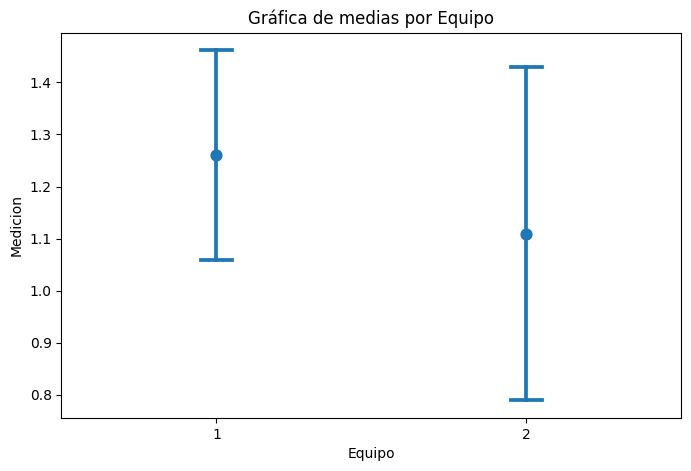

<ipython-input-24-7e2e7785bb53>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Operador', y='Medicion', data=df, capsize=0.1, ci="sd", join=False)
<ipython-input-24-7e2e7785bb53>:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Operador', y='Medicion', data=df, capsize=0.1, ci="sd", join=False)


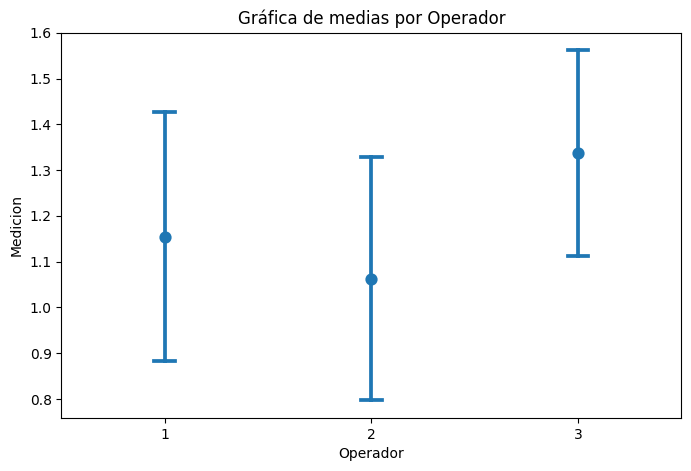

In [24]:
# KARLA MICHEL JIMENEZ ORTIZ

# Gráfica de medias por equipo
plt.figure(figsize=(8,5))
sns.pointplot(x='Equipo', y='Medicion', data=df, capsize=0.1, ci='sd', join=False)
plt.title('Gráfica de medias por Equipo')
plt.show()

# Gráfica de medias por operador
plt.figure(figsize=(8,5))
sns.pointplot(x='Operador', y='Medicion', data=df, capsize=0.1, ci="sd", join=False)
plt.title('Gráfica de medias por Operador')
plt.show()


##e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.

TEST DE SHAPIRO NORMALIDAD

In [25]:
# KARLA MICHEL JIMENEZ ORTIZ

# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Equipo'] == 1]['Medicion'], "Equipo 1", nivel_de_significancia)
prueba_shapiro(df[df['Equipo'] == 2]['Medicion'], "Equipo 2", nivel_de_significancia)


Prueba de Shapiro-Wilk para Equipo 1:
Estadístico: 0.9726
Valor p: 0.6111
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Equipo 2:
Estadístico: 0.9602
Valor p: 0.3129
Interpretación: Los datos tienen una distribución normal.


TEST DE BARLETT HOMOSCEDASTICIDAD

In [26]:
# KARLA MICHEL JIMENEZ ORTIZ

from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Equipo'] == 1]['Medicion'],
    df[df['Equipo'] == 2]['Medicion'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")


Estadístico de Bartlett: 5.861857628615241
Valor p: 0.015472455921016526
Rechazamos la hipótesis nula: Las varianzas no son iguales.


## Problema 6
Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. De manera tradicional se han usado termómetros de mercurio (Mer) para verificar que la temperatura sea la adecuada, pero ahora se han comprado termómetros electrónicos (Rtd) para facilitar el proceso de medición. Sin embargo, se duda de las mediciones de estos nuevos dispositivos. Para aclarar dudas y diagnosticar la situación, durante cinco días se toman mediciones con ambos tipos de termómetros en varios silos (a la misma hora). Los datos para cinco silos se muestran a continuación:

| Silo | Día 1 (Mer) | Día 1 (Rtd) | Día 2 (Mer) | Día 2 (Rtd) | Día 3 (Mer) | Día 3 (Rtd) | Día 4 (Mer) | Día 4 (Rtd) | Día 5 (Mer) | Día 5 (Rtd) |
|------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|--|
| A    | 4.0         | 2.6         | 4.0         | 2.8         | 5.0         | 5.0         | 0.5         | 0.0         | 3.0         | 2.4         |
| B    | 5.0         | 6.4         | 6.0         | 6.4         | 2.0         | 2.3         | 4.0         | 4.2         | 4.0         | 4.0         |
| C    | 4.5         | 3.3         | 4.0         | 1.4         | 3.5         | 1.8         | 2.0         | -1.9        | 3.0         | -7.6        |
| D    | 2.5         | 3.1         | 4.0         | 5.0         | 6.5         | 6.6         | 4.5         | 2.7         | 4.0         | 4.0         |
| E    | 4.0         | 0.0         | 4.0         | 3.5         | 0.6         | 2.0         | -4.0        | -4.0        | -4.0        | -6.3        |

**Preguntas:**<br>
a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).  
b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.  
c) Repita el inciso anterior pero ahora para las mediciones Mer.  
d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.  
e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.


##a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).




Al comparar las mediciones de los termómetros electrónicos con los de mercurio, se nota que las mediciones electrónicas son muy variables y en algunos casos tienen valores poco realistas (como números negativos o muy diferentes). Esto indica que los termómetros electrónicos pueden no ser muy confiables o que están descalibrados.

## b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.


##MODELO ESTADISTICO
El modelo estadístico es un modelo lineal con un factor y un bloque.



In [27]:
# KARLA MICHEL JIMENEZ ORTIZ
import pandas as pd
from io import StringIO

data = '''
Silo,Dia,Valor
A,Día 1,2.6
A,Día 2,2.8
A,Día 3,5.0
A,Día 4,0.0
A,Día 5,2.4
B,Día 1,6.4
B,Día 2,6.4
B,Día 3,2.3
B,Día 4,4.2
B,Día 5,4.0
C,Día 1,3.3
C,Día 2,1.4
C,Día 3,1.8
C,Día 4,-1.9
C,Día 5,-7.6
D,Día 1,3.1
D,Día 2,5.0
D,Día 3,6.6
D,Día 4,2.7
D,Día 5,4.0
E,Día 1,0.0
E,Día 2,3.5
E,Día 3,2.0
E,Día 4,-4.0
E,Día 5,-6.3

'''

df = pd.read_csv(StringIO(data))
df

,Silo,Dia,Valor
0,A,Día 1,2.6
1,A,Día 2,2.8
2,A,Día 3,5.0
3,A,Día 4,0.0
4,A,Día 5,2.4
5,B,Día 1,6.4
6,B,Día 2,6.4
7,B,Día 3,2.3
8,B,Día 4,4.2
9,B,Día 5,4.0


In [28]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Dia'    # La variable que no me interesa comparar
interes = 'Silo'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
            sum_sq    df         F    PR(>F)
C(Silo)   140.5424   4.0  6.189550  0.003304
C(Dia)     86.8984   4.0  3.827044  0.022852
Residual   90.8256  16.0       NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


##CONCLUSIONES
El análisis de varianza muestra que hay diferencias significativas entre las temperaturas medidas con el termómetro electrónico en los distintos silos, ya que el valor p asociado al efecto silo es menor a 0.05. Esto indica que la temperatura registrada varía de un silo a otro y no es producto del azar. Además, también hay diferencias significativas entre los días de medición, lo que significa que las condiciones varían con el tiempo y afectan las lecturas. Por lo tanto, el uso del día como bloque es adecuado para controlar esta variabilidad y obtener una comparación más precisa entre silos. En resumen, la temperatura medida con el termómetro electrónico depende tanto del silo como del día, lo que justifica el diseño en bloques para este análisis. Sin embargo, dado que algunas mediciones electrónicas parecen muy variables, es importante considerar que podría haber problemas de confiabilidad o precisión en los termómetros electrónicos.



## c) Repita el inciso anterior pero ahora para las mediciones Mer.


In [29]:
# KARLA MICHEL JIMENEZ ORTIZ
import pandas as pd
from io import StringIO

data = '''
Silo,Dia,Valor
A,Día 1,4.0
A,Día 2,4.0
A,Día 3,5.0
A,Día 4,0.5
A,Día 5,3.0
B,Día 1,5.0
B,Día 2,6.0
B,Día 3,2.0
B,Día 4,4.0
B,Día 5,4.0
C,Día 1,4.5
C,Día 2,4.0
C,Día 3,3.5
C,Día 4,2.0
C,Día 5,3.0
D,Día 1,2.5
D,Día 2,4.0
D,Día 3,6.5
D,Día 4,4.5
D,Día 5,4.0
E,Día 1,4.0
E,Día 2,4.0
E,Día 3,0.6
E,Día 4,-4.0
E,Día 5,-4.0

'''

df = pd.read_csv(StringIO(data))
df

,Silo,Dia,Valor
0,A,Día 1,4.0
1,A,Día 2,4.0
2,A,Día 3,5.0
3,A,Día 4,0.5
4,A,Día 5,3.0
5,B,Día 1,5.0
6,B,Día 2,6.0
7,B,Día 3,2.0
8,B,Día 4,4.0
9,B,Día 5,4.0


In [30]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Dia'    # La variable que no me interesa comparar
interes = 'Silo'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
           sum_sq    df         F    PR(>F)
C(Silo)   58.2696   4.0  3.697403  0.025752
C(Dia)    33.8496   4.0  2.147872  0.121867
Residual  63.0384  16.0       NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


El análisis de varianza con las mediciones de mercurio muestra que existen diferencias significativas entre los silos, ya que el valor p para el efecto silo es 0.0257, menor a 0.05. Esto indica que la temperatura promedio registrada por los termómetros de mercurio varía de un silo a otro. Sin embargo, para el efecto día (bloque), el valor p es 0.1219, mayor a 0.05, por lo que no hay evidencia suficiente para afirmar que las temperaturas varían entre los días. Esto sugiere que, a diferencia de las mediciones electrónicas, las mediciones con mercurio son más estables y no se ven afectadas significativamente por el día de medición. En resumen, las diferencias en la temperatura se deben principalmente al silo, mientras que la variación entre días es pequeña o inexistente.

## d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.


Las conclusiones obtenidas en los incisos anteriores coinciden en que ambos métodos, el termómetro de mercurio (Mer) y el electrónico (Rtd), detectan diferencias significativas en la temperatura entre los silos. Esto indica que, independientemente del método de medición, los silos presentan variaciones reales en temperatura.

Sin embargo, hay una diferencia importante: las mediciones electrónicas muestran también diferencias significativas entre los días, mientras que las mediciones con mercurio no. Esto sugiere que las mediciones electrónicas son más variables o sensibles a factores externos que cambian con el tiempo, mientras que las mediciones de mercurio son más estables y consistentes día con día.

En resumen, aunque ambos métodos coinciden en que la temperatura varía según el silo, el termómetro de mercurio ofrece una mayor estabilidad en las mediciones a lo largo del tiempo. Esto pone en duda la confiabilidad del termómetro electrónico para un monitoreo preciso, especialmente cuando las condiciones ambientales o de operación varían.



## e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.

##METODO ESTADISTICO
Un factor de interés (tratamiento): el tipo de termómetro (Categoría)

Dos bloques (fuentes de variación que se controlan): el Silo y el Día

Variable de respuesta: la temperatura medida (Valor)



In [31]:
# KARLA MICHEL JIMENEZ ORTIZ
import pandas as pd
from io import StringIO
data = '''
Silo,Día,Categoría,Valor
A,Día 1,Mer,4.0
A,Día 1,Rtd,2.6
A,Día 2,Mer,4.0
A,Día 2,Rtd,2.8
A,Día 3,Mer,5.0
A,Día 3,Rtd,5.0
A,Día 4,Mer,0.5
A,Día 4,Rtd,0.0
A,Día 5,Mer,3.0
A,Día 5,Rtd,2.4
B,Día 1,Mer,5.0
B,Día 1,Rtd,6.4
B,Día 2,Mer,6.0
B,Día 2,Rtd,6.4
B,Día 3,Mer,2.0
B,Día 3,Rtd,2.3
B,Día 4,Mer,4.0
B,Día 4,Rtd,4.2
B,Día 5,Mer,4.0
B,Día 5,Rtd,4.0
C,Día 1,Mer,4.5
C,Día 1,Rtd,3.3
C,Día 2,Mer,4.0
C,Día 2,Rtd,1.4
C,Día 3,Mer,3.5
C,Día 3,Rtd,1.8
C,Día 4,Mer,2.0
C,Día 4,Rtd,-1.9
C,Día 5,Mer,3.0
C,Día 5,Rtd,-7.6
D,Día 1,Mer,2.5
D,Día 1,Rtd,3.1
D,Día 2,Mer,4.0
D,Día 2,Rtd,5.0
D,Día 3,Mer,6.5
D,Día 3,Rtd,6.6
D,Día 4,Mer,4.5
D,Día 4,Rtd,2.7
D,Día 5,Mer,4.0
D,Día 5,Rtd,4.0
E,Día 1,Mer,4.0
E,Día 1,Rtd,0.0
E,Día 2,Mer,4.0
E,Día 2,Rtd,3.5
E,Día 3,Mer,0.6
E,Día 3,Rtd,2.0
E,Día 4,Mer,-4.0
E,Día 4,Rtd,-4.0
E,Día 5,Mer,-4.0
E,Día 5,Rtd,-6.3
'''
df = pd.read_csv(StringIO(data))
df

,Silo,Día,Categoría,Valor
0,A,Día 1,Mer,4.0
1,A,Día 1,Rtd,2.6
2,A,Día 2,Mer,4.0
3,A,Día 2,Rtd,2.8
4,A,Día 3,Mer,5.0
5,A,Día 3,Rtd,5.0
6,A,Día 4,Mer,0.5
7,A,Día 4,Rtd,0.0
8,A,Día 5,Mer,3.0
9,A,Día 5,Rtd,2.4


In [32]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Silo'   # Primer bloque (factor no principal)
bloque_2 = 'Día'      # Segundo bloque (factor no principal)
interes = 'Categoría'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")


Resultados del ANOVA para el Cuadro Latino:
                sum_sq    df         F    PR(>F)
C(Categoría)   14.4722   1.0  2.976019  0.092227
C(Silo)       168.4692   4.0  8.660872  0.000039
C(Día)        110.4372   4.0  5.677491  0.001025
Residual      194.5176  40.0       NaN       NaN

Conclusión: No hay diferencias significativas: Categoría.
Conclusión: Hay diferencias significativas: Silo.
Conclusión: Hay diferencias significativas: Día.


##CONCLUSIONES

Aunque los valores medidos con los termómetros de mercurio y los electrónicos no son exactamente iguales, el análisis estadístico indica que no hay diferencias significativas entre ellos (valor p = 0.092 > 0.05). Esto sugiere que ambos tipos de termómetro proporcionan mediciones comparables, al menos dentro del rango y condiciones de este experimento.

Por otro lado, sí se encontraron diferencias significativas entre los silos y entre los días, lo que implica que la temperatura varía de manera importante dependiendo del lugar y el momento de la medición. Esto refuerza la importancia de controlar esas dos fuentes de variación cuando se evalúa la precisión de los dispositivos.

En resumen, la variación en la temperatura parece deberse más al silo y al día que al tipo de termómetro, por lo que los termómetros electrónicos podrían ser una alternativa válida al método tradicional.


## Problema 7
Se quiere estudiar el efecto de cinco diferentes catalizadores (**A, B, C, D y E**) sobre el **tiempo de reacción** de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente a los **lotes y días**. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11| E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10| E = 1 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10|
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


**Preguntas:**<br>
a) ¿Cómo se aleatorizó el experimento?  
b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.  
c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?  
d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  
e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  
f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.


In [33]:
# KARLA MICHEL JIMENEZ ORTIZ
data = '''
Lote,Día,Categoría,Valor
1,Día 1,A,8
1,Día 2,B,7
1,Día 3,D,1
1,Día 4,C,7
1,Día 5,E,3
2,Día 1,C,11
2,Día 2,E,2
2,Día 3,A,7
2,Día 4,D,3
2,Día 5,B,8
3,Día 1,B,4
3,Día 2,A,9
3,Día 3,C,10
3,Día 4,E,1
3,Día 5,D,5
4,Día 1,D,6
4,Día 2,C,8
4,Día 3,E,6
4,Día 4,B,6
4,Día 5,A,10
5,Día 1,E,4
5,Día 2,D,2
5,Día 3,B,3
5,Día 4,A,8
5,Día 5,C,8
'''

df = pd.read_csv(StringIO(data))
df

,Lote,Día,Categoría,Valor
0,1,Día 1,A,8
1,1,Día 2,B,7
2,1,Día 3,D,1
3,1,Día 4,C,7
4,1,Día 5,E,3
5,2,Día 1,C,11
6,2,Día 2,E,2
7,2,Día 3,A,7
8,2,Día 4,D,3
9,2,Día 5,B,8


##a) ¿Cómo se aleatorizó el experimento?


El diseño seguido es un cuadro latino de tamaño 5x5, lo que significa que hay cinco tratamientos (catalizadores A, B, C, D y E), y se controlan dos fuentes de variabilidad: los lotes de material y los días en que se realizan las corridas. En este tipo de diseño, cada tratamiento debe aparecer exactamente una vez en cada fila y una vez en cada columna. Las filas representan los lotes y las columnas representan los días, por lo tanto, la aleatorización consiste en distribuir los tratamientos (catalizadores) en la tabla de tal manera que en cada fila y en cada columna no se repita ningún tratamiento. Esto asegura que cualquier efecto causado por el lote o por el día no se confunda con el efecto del tratamiento, es decir, se controla sistemáticamente la variabilidad que proviene de estas dos fuentes externas al tratamiento, permitiendo que la comparación entre tratamientos sea más precisa y confiable.

##b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.


In [34]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Lote'   # Primer bloque (factor no principal)
bloque_2 = 'Día'      # Segundo bloque (factor no principal)
interes = 'Categoría'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

Resultados del ANOVA para el Cuadro Latino:
              sum_sq    df          F    PR(>F)
C(Categoría)  141.44   4.0  11.309168  0.000488
C(Lote)        15.44   4.0   1.234542  0.347618
C(Día)         12.24   4.0   0.978678  0.455014
Residual       37.52  12.0        NaN       NaN

Conclusión: Hay diferencias significativas: Categoría.
Conclusión: No hay diferencias significativas: Lote.
Conclusión: No hay diferencias significativas: Día.


## HIPOTESIS

###Tratamientos (catalizadores):
Se asume que todos los catalizadores tienen el mismo comportamiento en cuanto al tiempo de reacción del proceso químico. No se espera que haya diferencias entre ellos. El análisis se realiza para comprobar si alguno de los catalizadores produce un cambio en el tiempo de reacción respecto a los otros.



###Bloques por lote:
Se considera que los distintos lotes de material no modifican el tiempo de reacción. El análisis permite verificar si hay alguna variación asociada al lote del material que se está utilizando en cada corrida.



###Bloques por día:
Se supone que el día en que se realiza la prueba no altera los resultados del tiempo de reacción. Se analiza si existen diferencias entre días que puedan influir en el comportamiento del proceso.

##c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?


Los resultados del análisis de varianza muestran que el factor Categoría (los catalizadores) tiene un valor F alto y un valor p muy pequeño (0.000488), lo que indica que existen diferencias significativas entre los cinco catalizadores en cuanto al tiempo de reacción. Esto quiere decir que no todos los catalizadores tienen el mismo efecto y al menos uno provoca un cambio real en el tiempo de reacción del proceso.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -6.2171  0.6171  False
     A      C      0.4 0.9965 -3.0171  3.8171  False
     A      D     -5.0 0.0024 -8.4171 -1.5829   True
     A      E     -5.2 0.0016 -8.6171 -1.7829   True
     B      C      3.2 0.0733 -0.2171  6.6171  False
     B      D     -2.2 0.3361 -5.6171  1.2171  False
     B      E     -2.4 0.2578 -5.8171  1.0171  False
     C      D     -5.4 0.0011 -8.8171 -1.9829   True
     C      E     -5.6 0.0007 -9.0171 -2.1829   True
     D      E     -0.2 0.9998 -3.6171  3.2171  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

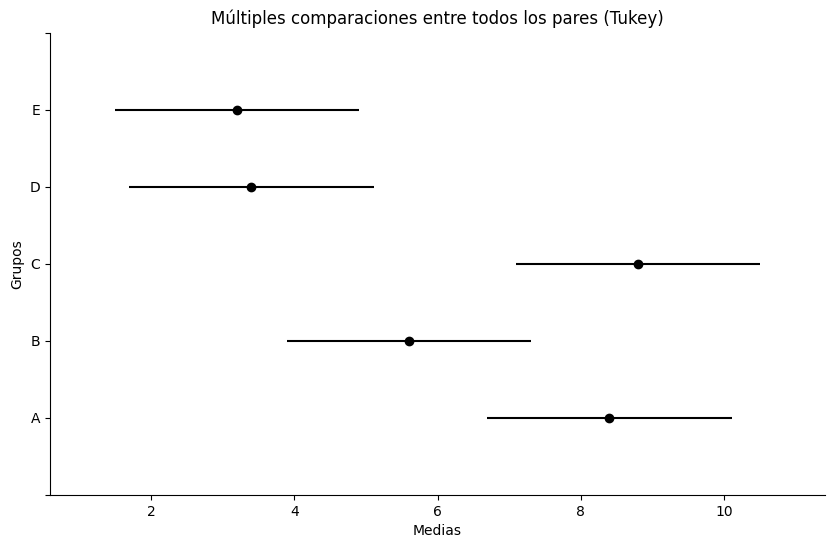

In [35]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Categoría'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Los catalizadores D y E forman un grupo que produce tiempos de reacción significativamente más bajos que los catalizadores A y C.

Los catalizadores A, B y C no se diferencian significativamente entre sí.

Por tanto, los mejores catalizadores para reducir el tiempo de reacción son D y E.

Los catalizadores A, B y C tienen tiempos más largos y no presentan diferencias importantes entre ellos.

En conclusión, al elegir un catalizador para optimizar el proceso químico, conviene preferir D o E, ya que su efecto sobre el tiempo de reacción es estadísticamente mejor que el de los demás catalizadores.

##d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?


Al analizar los resultados del ANOVA, se observa que los factores de bloqueo que corresponden a los lotes y a los días no tienen un efecto significativo sobre el tiempo de reacción. Esto significa que las variaciones que puedan existir entre los diferentes lotes de material y entre los distintos días en que se realizaron las corridas no influyen de forma importante en el resultado. En otras palabras, aunque se usaron diferentes lotes y las mediciones se hicieron en días distintos, estas condiciones no alteraron el tiempo medido de reacción. Por lo tanto, estos factores pueden considerarse controlados o neutralizados gracias al diseño en cuadro latino, que fue creado precisamente para minimizar la influencia de estas variables no deseadas. Esto permite confiar en que las diferencias encontradas en el tiempo de reacción se deben principalmente al efecto de los catalizadores y no a factores externos como el lote o el día.

##e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?


<ipython-input-36-cea02bfeb4d7>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Categoría", y="Valor", estimator=np.mean, ci=None)
<ipython-input-36-cea02bfeb4d7>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Lote", y="Valor", estimator=np.mean, ci=None)
<ipython-input-36-cea02bfeb4d7>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Día", y="Valor", estimator=np.mean, ci=None)


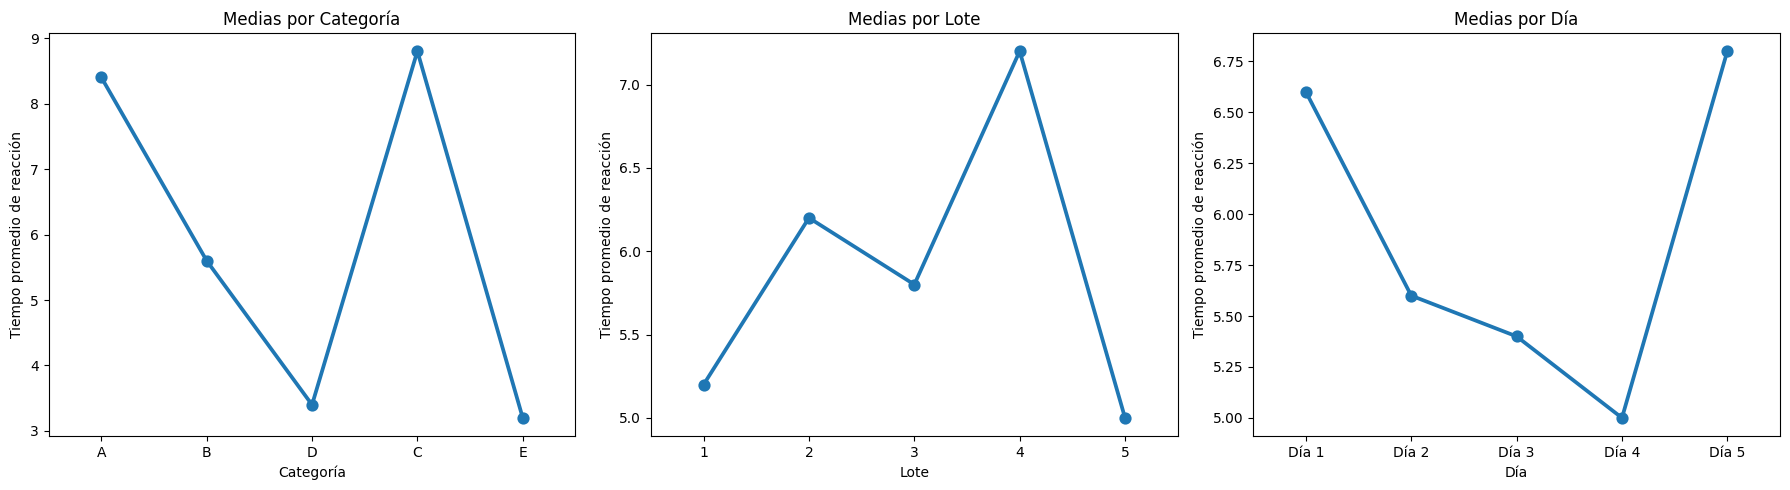

In [36]:
# KARLA MICHEL JIMENEZ ORTIZ
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gráfico de medias por tratamiento (Catalizador)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.pointplot(data=df, x="Categoría", y="Valor", estimator=np.mean, ci=None)
plt.title("Medias por Categoría")
plt.ylabel("Tiempo promedio de reacción")

# Gráfico de medias por Lote
plt.subplot(1, 3, 2)
sns.pointplot(data=df, x="Lote", y="Valor", estimator=np.mean, ci=None)
plt.title("Medias por Lote")
plt.ylabel("Tiempo promedio de reacción")

# Gráfico de medias por Día
plt.subplot(1, 3, 3)
sns.pointplot(data=df, x="Día", y="Valor", estimator=np.mean, ci=None)
plt.title("Medias por Día")
plt.ylabel("Tiempo promedio de reacción")

plt.tight_layout()
plt.show()

##Interpretación:
Catalizadores:
El gráfico muestra que los catalizadores D y E tienen los tiempos promedio de reacción más bajos, lo que indica que son los más eficaces para acelerar el proceso químico. Esto concuerda con los resultados del ANOVA y la prueba de Tukey, que mostraron diferencias significativas y favorecieron estos tratamientos.

Lotes:
Las medias por lote son similares entre sí, sin grandes diferencias. Esto sugiere que el lote no tiene un efecto importante en el tiempo de reacción, es decir, no introduce variabilidad significativa.

Días:
Al igual que los lotes, los días presentan medias muy cercanas unas a otras. Esto también confirma que el día en que se realizó el experimento no afecta significativamente los resultados.

Conclusión:
El mejor tratamiento es el catalizador D o E, ya que generan los tiempos de reacción más cortos. Además, se confirma que los factores de bloque (lote y día) fueron controlados eficazmente y no interfieren con la evaluación del efecto de los tratamientos.

##f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.

##TEST DE SHAPIRO SUPUESTO DE NORMALIDAD

In [37]:
# KARLA MICHEL JIMENEZ ORTIZ
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Categoría'] == 'A']['Valor'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Categoría'] == 'B']['Valor'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['Categoría'] == 'C']['Valor'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['Categoría'] == 'D']['Valor'], "Grupo D", nivel_de_significancia)
prueba_shapiro(df[df['Categoría'] == 'E']['Valor'], "Grupo E", nivel_de_significancia)



Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9609
Valor p: 0.8140
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9524
Valor p: 0.7540
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.9137
Valor p: 0.4899
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.9524
Valor p: 0.7540
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo E:
Estadístico: 0.9787
Valor p: 0.9276
Interpretación: Los datos tienen una distribución normal.


## TEST DE BARLETT SUPUESTO DE HOMOSCEDASTICIDAD

In [38]:
# KARLA MICHEL JIMENEZ ORTIZ
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Categoría'] == 'A']['Valor'],
    df[df['Categoría'] == 'B']['Valor'],
    df[df['Categoría'] == 'C']['Valor'],
    df[df['Categoría'] == 'D']['Valor'],
    df[df['Categoría'] == 'E']['Valor'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")


Estadístico de Bartlett: 3.964568090461087
Valor p: 0.4108222744947537
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 8
En el problema anterior elimine el factor de bloque días, y conteste:

a) ¿Se justifica la eliminación?  
b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?


##a) ¿Se justifica la eliminación?


Sí, se justifica eliminar el factor día porque en el análisis inicial del ANOVA, el efecto de día resultó no significativo (p > 0.4), lo que indica que las diferencias en los días no afectan de manera importante el tiempo de reacción. Mantener un factor no significativo en el modelo puede complicar innecesariamente el análisis y reducir la precisión de las estimaciones. Por ello, eliminarlo simplifica el modelo sin perder información relevante, permitiendo enfocarse en los factores que realmente influyen, como los tratamientos (catalizadores) y el lote.



##b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.


## NOMBRE DEL DISEÑO
El diseño que se utiliza es un Diseño en Bloques Completos Aleatorizados con un solo factor de bloque (lote) y un factor de interés (catalizador). Esto permite controlar la variabilidad del lote mientras se evalúa el efecto del catalizador sobre el tiempo de reacción.

In [39]:
# KARLA MICHEL JIMENEZ ORTIZ
import pandas as pd
from io import StringIO

data = '''
Lote,Catalizador,Valor
1,A,8
1,B,7
1,D,1
1,C,7
1,E,3
2,C,11
2,E,2
2,A,7
2,D,3
2,B,8
3,B,4
3,A,9
3,C,10
3,E,1
3,D,5
4,D,6
4,C,8
4,E,6
4,B,6
4,A,10
5,E,4
5,D,2
5,B,3
5,A,8
5,C,8

'''

df = pd.read_csv(StringIO(data))
df



,Lote,Catalizador,Valor
0,1,A,8
1,1,B,7
2,1,D,1
3,1,C,7
4,1,E,3
5,2,C,11
6,2,E,2
7,2,A,7
8,2,D,3
9,2,B,8


In [40]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Catalizador'    # La variable que no me interesa comparar
interes = 'Lote'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
                sum_sq    df          F    PR(>F)
C(Lote)          15.44   4.0   1.241158  0.333144
C(Catalizador)  141.44   4.0  11.369775  0.000146
Residual         49.76  16.0        NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


## HIPOTESIS


###Para los tratamientos (catalizadores):

Se plantea que todos los catalizadores producen el mismo efecto sobre el tiempo de reacción, es decir, que no hay diferencias entre los tiempos de reacción causados por cada uno de los cinco catalizadores. Esto significa que, si se cumple, no existe ningún catalizador que reduzca o aumente el tiempo de reacción en forma diferente a los otros.

En contraste, se contempla que al menos un catalizador genera un efecto diferente, es decir, que hay diferencias significativas entre algunos de los catalizadores respecto al tiempo que tardan en provocar la reacción.



###Para los bloques (lotes):

Se plantea que los diferentes lotes no influyen en el tiempo de reacción, es decir, que los tiempos medidos en cada lote son iguales en promedio y que cualquier diferencia observada se debe al azar o a la variabilidad natural del proceso.

En contraste, se considera que al menos un lote tiene un efecto distinto, lo que quiere decir que la variación entre lotes sí afecta el tiempo de reacción y debe ser tomada en cuenta para entender los resultados.


##c) Pruebe las hipótesis y obtenga conclusiones.


##PRUEBA DE HIPOTESIS
Al realizar el análisis de varianza sin el factor día, se observa que el efecto del catalizador sigue siendo significativo. Esto indica que existen diferencias reales entre los tiempos de reacción que producen los distintos catalizadores, confirmando que algunos son mejores que otros.

En cambio, el efecto del lote permanece no significativo, lo que quiere decir que las variaciones entre lotes no afectan el tiempo de reacción. Por lo tanto, se concluye que el catalizador influye significativamente en el proceso, mientras que el lote no, y que la exclusión del factor día no altera estas conclusiones.

##CONCLUSIONES

Se encontró que los catalizadores (tratamientos) presentan diferencias significativas en el tiempo de reacción. Esto quiere decir que no todos los catalizadores funcionan igual; algunos aceleran o retrasan el proceso químico de manera diferente. Por lo tanto, es importante identificar cuáles catalizadores son más efectivos para optimizar el proceso.

En cambio, el factor lote no mostró un efecto significativo. Esto indica que las variaciones entre los diferentes lotes de material no influyen de manera importante en el tiempo de reacción, por lo que podemos considerar que la fuente de variabilidad del lote es pequeña o irrelevante para este experimento.

La eliminación del factor día no afectó la capacidad de detectar las diferencias entre catalizadores, por lo que las conclusiones sobre qué catalizadores son distintos se mantienen válidas y confiables.

Finalmente, el error experimental que queda en el modelo representa la variabilidad no explicada por los catalizadores ni por los lotes, es decir, factores aleatorios o variables no consideradas.

##d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?


Al eliminar el factor día, el cuadro medio del error (varianza residual) aumenta en comparación con el modelo que incluye día y lote. Esto ocurre porque en el modelo original, el factor día absorbía parte de la variabilidad experimental. Al eliminarlo, esta variabilidad que antes se explicaba ahora queda incorporada en el error. Esto es esperado y normal, ya que el modelo simplificado explica menos fuentes de variación, lo que hace que el error sea mayor. A pesar de este aumento, el modelo más simple puede ser preferible por ser más fácil de interpretar y porque el factor día no aportaba información significativa.

##e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?

Las conclusiones sobre las diferencias entre catalizadores coinciden en ambos análisis porque el factor día no afecta de manera significativa el tiempo de reacción. Esto significa que las diferencias observadas entre los tratamientos son consistentes y robustas, independientemente de si el día se incluye o no en el modelo. Dado que el día no contribuye a explicar la variabilidad del proceso, eliminarlo no cambia el efecto principal que es el de los catalizadores. Así, la evidencia estadística sobre cuáles catalizadores son mejores se mantiene igual en ambos enfoques.

## Problema 9
Con respecto a los problemas 7 y 8, además de eliminar el factor día ahora elimine el factor lote, y conteste lo siguiente:

a) ¿Se justifica esta segunda eliminación en ambos problemas?  
b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?  
f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?  


##a) ¿Se justifica esta segunda eliminación en ambos problemas?


En ambos problemas anteriores (problemas 7 y 8), el análisis ANOVA mostró que el factor “día” no fue significativo y posteriormente también se observó que el factor “lote” tampoco fue significativo. Esto significa que ni el día ni el lote generan una variación importante en la variable de respuesta (tiempo de reacción).

Por lo tanto, sí se justifica la segunda eliminación del factor lote. Al eliminar ambos factores de bloque, se reduce la complejidad del modelo sin perder información útil, ya que dichos factores no aportan a la explicación de la variabilidad. La eliminación ayuda a simplificar el análisis estadístico y a centrarse en lo que realmente importa: los tratamientos.

##b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.


###Nombre del diseño:Diseño completamente al azar (DCA)

In [41]:
#KARLA MICHEL JIMENEZ ORTIZ
import pandas as pd
from io import StringIO

data = '''
Catalizador,Valor
A,8
B,7
D,1
C,7
E,3
C,11
E,2
A,7
D,3
B,8
B,4
A,9
C,10
E,1
D,5
D,6
C,8
E,6
B,6
A,10
E,4
D,2
B,3
A,8
C,8
'''

df = pd.read_csv(StringIO(data))
df

,Catalizador,Valor
0,A,8
1,B,7
2,D,1
3,C,7
4,E,3
5,C,11
6,E,2
7,A,7
8,D,3
9,B,8


In [42]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

interes = 'Catalizador'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")


Resultados del ANOVA:
                sum_sq    df          F    PR(>F)
C(Catalizador)  141.44   4.0  10.846626  0.000077
Residual         65.20  20.0        NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.


##HIPOTESIS
En este problema, luego de eliminar ambos factores de bloque (día y lote), se utiliza un diseño completamente al azar, donde el único factor de interés es el tratamiento (es decir, el tipo de catalizador A, B, C, D o E), y se desea saber si alguno de estos tratamientos afecta de forma diferente el tiempo de reacción del proceso químico.

La hipótesis nula establece que no existe diferencia en los efectos de los tratamientos, lo que significa que todos los catalizadores producen, en promedio, el mismo tiempo de reacción. Es decir, cualquier diferencia observada entre los tiempos se debe solamente al azar o a variabilidad natural.

La hipótesis alternativa plantea que al menos uno de los tratamientos tiene un efecto diferente, es decir, que hay diferencias reales en los tiempos de reacción que no se pueden atribuir solo al azar, sino que dependen del tipo de catalizador utilizado.

En términos del modelo estadístico, esto significa que se está evaluando si todos los efectos del tratamiento son iguales a cero (sin efecto real), o si al menos uno de ellos es distinto, lo que indicaría un efecto diferencial entre los tratamientos.

Estas hipótesis son apropiadas porque ahora solo se está considerando una sola fuente de variación controlada (el tratamiento) y todo lo demás se considera aleatorio o parte del error experimental.

##c) Pruebe las hipótesis y obtenga conclusiones.


Se realizó un análisis de varianza (ANOVA) considerando únicamente el efecto del factor de interés, que es el tipo de catalizador. Los resultados muestran un valor de F = 10.8466 y un valor de p = 0.000077, lo cual es mucho menor al nivel de significancia comúnmente utilizado (por ejemplo, 0.05).

Esto significa que hay evidencia estadísticamente significativa para rechazar la hipótesis nula. En consecuencia, se concluye que sí existen diferencias reales en los tiempos de reacción entre al menos dos de los cinco catalizadores evaluados. Es decir, no todos los catalizadores tienen el mismo efecto sobre el tiempo de reacción, y el tipo de catalizador sí influye en el proceso químico.

##d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?


En esta comparación se observa que, al eliminar ambos factores de bloqueo, el cuadro medio del error aumentó respecto a cuando se utilizaban bloques. Esto es lógico, porque al no controlar la variabilidad introducida por el día y el lote, esa variación pasa a formar parte del error residual, haciendo que el modelo sea menos preciso.

Esto implica que los bloques ayudaban a reducir la variabilidad no explicada y mejorar la sensibilidad del análisis.

##e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?


Aunque los diseños han sido simplificados (primero quitando un bloque y luego ambos), las conclusiones acerca del factor tratamiento (catalizador) se han mantenido constantes. Esto ocurre porque las diferencias entre los tratamientos son lo suficientemente grandes y consistentes como para ser detectadas incluso cuando se elimina el control sobre otras fuentes de variación.

En otras palabras, la señal del efecto del tratamiento es más fuerte que el ruido añadido por la eliminación de los bloques, lo cual permite que los resultados sigan siendo significativos. La robustez de la diferencia entre tratamientos hace que el diseño más simple aún sea capaz de identificarla.

##f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?

Sí. Si los factores de bloque (día o lote) hubieran sido estadísticamente significativos, su eliminación del modelo hubiera afectado negativamente la precisión del análisis. En ese caso, al no controlar esas fuentes de variabilidad, el error residual habría aumentado aún más, reduciendo la capacidad de detectar diferencias entre tratamientos.

En concreto, al ignorar un bloque significativo, se mezcla su efecto con el error, haciendo que los resultados del tratamiento sean menos confiables y el modelo más débil. En este experimento, no ocurrió porque ambos bloques eran no significativos, pero si lo hubieran sido, la eliminación habría distorsionado las conclusiones y posiblemente llevado a resultados incorrectos.

## Problema 10
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**<br>
a) ¿Hay diferencias entre los proveedores?  
b) ¿Hay diferencias entre los inspectores y entre las escalas?  
c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  
d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.  


In [43]:
# KARLA MICHEL JIMENEZ ORTIZ
data = '''
Inspector,Escala,Categoría,Valor
I,Escala 1,A,16
I,Escala 2,B,10
I,Escala 3,C,11
II,Escala 1,B,15
II,Escala 2,C,9
II,Escala 3,A,14
III,Escala 1,C,13
III,Escala 2,A,11
III,Escala 3,B,13
'''

df = pd.read_csv(StringIO(data))
df

,Inspector,Escala,Categoría,Valor
0,I,Escala 1,A,16
1,I,Escala 2,B,10
2,I,Escala 3,C,11
3,II,Escala 1,B,15
4,II,Escala 2,C,9
5,II,Escala 3,A,14
6,III,Escala 1,C,13
7,III,Escala 2,A,11
8,III,Escala 3,B,13


In [44]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Inspector'   # Primer bloque (factor no principal)
bloque_2 = 'Escala'      # Segundo bloque (factor no principal)
interes = 'Categoría'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")



Resultados del ANOVA para el Cuadro Latino:
                 sum_sq   df      F    PR(>F)
C(Categoría)  10.888889  2.0   49.0  0.020000
C(Inspector)   0.222222  2.0    1.0  0.500000
C(Escala)     32.888889  2.0  148.0  0.006711
Residual       0.222222  2.0    NaN       NaN

Conclusión: Hay diferencias significativas: Categoría.
Conclusión: No hay diferencias significativas: Inspector.
Conclusión: Hay diferencias significativas: Escala.


##a) ¿Hay diferencias entre los proveedores?


Sí, el ANOVA muestra un valor p = 0.020 para el factor proveedor, lo cual es menor que 0.05. Esto indica que hay diferencias significativas entre los pesos entregados por los
proveedores. No todos entregan material con el mismo peso, por lo tanto, el proveedor influye en el resultado.

##b) ¿Hay diferencias entre los inspectores y entre las escalas?


Para los inspectores, el valor p = 0.500, mucho mayor que 0.05. Esto significa que no hay diferencia significativa entre ellos, es decir, no importa quién mida, los resultados son consistentes.

Para las escalas, el valor p = 0.0067, menor que 0.05, indica que sí hay diferencias entre ellas. Esto sugiere que las escalas no están midiendo igual y podría haber un problema de calibración o precisión.

##c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?


El proveedor A tuvo un promedio de 13.67 g, B de 12.67 g, y C de 11.00 g. El ideal es 15 g, por lo que el proveedor A es el más cercano al objetivo y el que mejor cumple con el requerimiento de peso.

##d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.

In [45]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Escala'    # La variable que no me interesa comparar
interes = 'Categoría'      # La variable que me interesa comparar
respuesta = 'Valor' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")



Resultados del ANOVA:
                 sum_sq   df      F    PR(>F)
C(Categoría)  10.888889  2.0   49.0  0.001538
C(Escala)     32.888889  2.0  148.0  0.000178
Residual       0.444444  4.0    NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


## ANALISIS

Se parte de un experimento con tres factores: proveedor, inspector y escala. El análisis inicial mostró que el factor inspector no es significativo, ya que su p-valor fue 0.500, indicando que no hay diferencias importantes entre las mediciones realizadas por los distintos inspectores. Al ser un factor de bloqueo que no aporta variabilidad explicativa al modelo, se decide eliminarlo para simplificar el análisis y mejorar la eficiencia del modelo estadístico. Se realiza un nuevo análisis de varianza incluyendo solo proveedor y escala como factores, y el resultado muestra que ambos factores son altamente significativos.

El proveedor tiene un p-valor de 0.001538, lo cual indica diferencias estadísticas importantes entre ellos, sugiriendo que el peso del material varía de forma consistente según el proveedor. Por otro lado, el factor escala tiene un p-valor aún más bajo, de 0.000178, lo que confirma que las básculas usadas en la medición introducen diferencias significativas en los valores registrados, lo cual podría deberse a diferencias de calibración, precisión o desgaste de los equipos. La eliminación del factor no significativo permitió aumentar los grados de libertad del error, mejorando la precisión del modelo y la fiabilidad de los resultados. Se concluye que el proveedor y la escala sí influyen de forma clara en las mediciones, y que el proveedor A, por su cercanía al valor objetivo de 15 gramos, es el más adecuado. La revisión técnica de las escalas también es necesaria para reducir errores de medición.

## Problema 11
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?  
b) ¿Cuál de los factores de bloque tuvo efectos?  
c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  
d) ¿Y con un diseño en bloques completos al azar?  


In [46]:
# KARLA MICHEL JIMENEZ ORTIZ
import pandas as pd
from io import StringIO

data = '''
Columna,Renglon,Variedad_de_Maiz,Valor
1,1,B,1.640
1,2,D,1.210
1,3,C,1.425
1,4,A,1.345
2,1,C,1.475
2,2,A,1.185
2,3,D,1.400
2,4,B,1.290
3,1,A,1.670
3,2,C,0.710
3,3,B,1.665
3,4,D,1.180
4,1,D,1.565
4,2,B,1.290
4,3,A,1.655
4,4,C,0.660

'''

df = pd.read_csv(StringIO(data))
df

,Columna,Renglon,Variedad_de_Maiz,Valor
0,1,1,B,1.640
1,1,2,D,1.210
2,1,3,C,1.425
3,1,4,A,1.345
4,2,1,C,1.475
5,2,2,A,1.185
6,2,3,D,1.400
7,2,4,B,1.290
8,3,1,A,1.670
9,3,2,C,0.710


In [47]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Columna'   # Primer bloque (factor no principal)
bloque_2 = 'Renglon'      # Segundo bloque (factor no principal)
interes = 'Variedad_de_Maiz'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")


Resultados del ANOVA para el Cuadro Latino:
                       sum_sq   df          F    PR(>F)
C(Variedad_de_Maiz)  0.426842  3.0   6.587865  0.025092
C(Columna)           0.030155  3.0   0.465406  0.716972
C(Renglon)           0.827342  3.0  12.769166  0.005148
Residual             0.129584  6.0        NaN       NaN

Conclusión: Hay diferencias significativas: Variedad_de_Maiz.
Conclusión: No hay diferencias significativas: Columna.
Conclusión: Hay diferencias significativas: Renglon.


##a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?


Sí, hay diferencias entre las variedades de maíz.
Esto significa que no todas las variedades producen lo mismo. Al hacer el análisis estadístico, encontramos que la probabilidad de que estas diferencias sean solo por casualidad es baja (p = 0.025).
Por lo tanto, al menos una variedad es mejor o peor que las otras en cuanto a rendimiento.

##b) ¿Cuál de los factores de bloque tuvo efectos?


El factor renglón sí tuvo efecto.
Esto quiere decir que las diferencias de rendimiento también dependen del renglón en el campo, posiblemente por efectos de cultivos anteriores (residuos en el suelo).
El análisis mostró que esto influye de forma significativa (p = 0.005).

El factor columna no tuvo efecto.
Esto indica que la posición horizontal de las parcelas (posible gradiente de fertilidad) no afectó de forma significativa los resultados (p = 0.717).

##c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?


Probablemente no.
Un diseño completamente al azar no toma en cuenta los renglones ni las columnas, y como vimos que los renglones sí afectan el rendimiento, eso habría aumentado el error del experimento.
Con más error, es más difícil detectar diferencias reales entre variedades. Así que es muy probable que no se hubieran detectado las mismas diferencias.

##d) ¿Y con un diseño en bloques completos al azar?

Tal vez sí, pero con menor precisión.
Un DBCA permite controlar una sola fuente de variación. Si se hubiera bloqueado por renglón (que sí tuvo efecto), habría ayudado a reducir el error, pero no tanto como el cuadro latino, que bloquea dos fuentes al mismo tiempo.
Por eso, el cuadro latino es más completo y más preciso para este experimento.

## Problema 12
Se quieren comparar tres dietas (**A, B, C**) a base de proteínas de origen vegetal utilizando 18 ratas de laboratorio de una misma camada. Primero se observa por un tiempo el apetito para formar tres grupos de seis ratas, según su voracidad; y cada uno de estos grupos se clasifica a su vez en tres grupos de dos ratas, de acuerdo a su peso inicial. Se plantea un experimento donde la variable de respuesta es el peso en gramos ganado por las ratas después de cierto periodo, con los siguientes resultados:

| Apetito/peso inicial | A1        | A2        | A3        |
|-----------------------|-----------|-----------|-----------|
| P1                   | 67 (C)    | 105 (A)   | 95 (B)    |
|                       | 72        | 112       | 86        |
| P2                   | 85 (A)    | 75 (B)    | 88 (C)    |
|                       | 98        | 67        | 110       |
| P3                   | 66 (B)    | 68 (C)    | 108 (A)   |
|                       | 47        | 91        | 120       |

### Preguntas:
a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?  
b) ¿Cuál dieta es mejor?  
c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.  
d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.  
e) Verifique los supuestos del modelo.  


In [48]:
# KARLA MICHEL JIMENEZ ORTIZ
import pandas as pd
from io import StringIO

data = '''
Apetito,Peso_inicial,Dieta,Valor
P1,A1,C,67
P1,A2,A,105
P1,A3,B,95
P1,A1,A,72
P1,A2,B,112
P1,A3,C,86
P2,A1,A,85
P2,A2,B,75
P2,A3,C,88
P2,A1,B,98
P2,A2,C,110
P3,A1,B,66
P3,A2,C,68
P3,A3,A,108
P3,A1,C,47
P3,A2,A,91
P3,A3,B,120
'''

df = pd.read_csv(StringIO(data))
df

,Apetito,Peso_inicial,Dieta,Valor
0,P1,A1,C,67
1,P1,A2,A,105
2,P1,A3,B,95
3,P1,A1,A,72
4,P1,A2,B,112
5,P1,A3,C,86
6,P2,A1,A,85
7,P2,A2,B,75
8,P2,A3,C,88
9,P2,A1,B,98


In [49]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Apetito'   # Primer bloque (factor no principal)
bloque_2 = 'Peso_inicial'      # Segundo bloque (factor no principal)
interes = 'Dieta'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")


Resultados del ANOVA para el Cuadro Latino:
                      sum_sq    df         F    PR(>F)
C(Dieta)         1162.627040   2.0  2.192871  0.162308
C(Apetito)        365.203963   2.0  0.688824  0.524490
C(Peso_inicial)  2527.370629   2.0  4.766961  0.035160
Residual         2650.924242  10.0       NaN       NaN

Conclusión: No hay diferencias significativas: Dieta.
Conclusión: No hay diferencias significativas: Apetito.
Conclusión: Hay diferencias significativas: Peso_inicial.


##a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?



Según el análisis de varianza (ANOVA), el único factor que tiene un efecto estadísticamente significativo sobre el peso ganado es el peso inicial de las ratas (p = 0.035). Esto indica que el peso con el que iniciaron las ratas influye en la cantidad de peso que ganan durante el experimento.

Por otro lado, tanto la dieta (p = 0.162) como el apetito (p = 0.524) no mostraron efectos estadísticamente significativos. Esto significa que, con la información y el diseño actuales, no se encontraron diferencias reales en el peso ganado debido a las distintas dietas ni al apetito inicial de las ratas.

##b) ¿Cuál dieta es mejor?


Aunque el análisis no mostró diferencias significativas entre las dietas, es posible observar los valores promedio de peso ganado para cada dieta para tener una idea general. Sin embargo, no se puede concluir con confianza estadística que alguna dieta sea mejor que otra, ya que la variabilidad y el tamaño de muestra no permiten afirmar que las diferencias observadas sean reales y no debidas al azar.

Por lo tanto, el experimento no aporta evidencia suficiente para recomendar una dieta superior basándose en el peso ganado

##c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.


El factor apetito puede considerarse prescindible en este experimento porque no mostró influencia significativa sobre el peso ganado (p = 0.524). Ignorar este factor podría simplificar el análisis sin perder precisión.

En contraste, el peso inicial es un factor que no debe ser ignorado. Tiene un efecto significativo (p = 0.035), lo que indica que controlar la variabilidad causada por diferencias iniciales en el peso de las ratas es importante para obtener resultados más precisos y confiables.

##d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.


Si decidimos ignorar el factor apetito, el análisis se puede simplificar considerando solo la dieta y el peso inicial como factores.

Al hacer esto, es probable que el peso inicial continúe mostrando un efecto significativo, mientras que la dieta probablemente siga sin mostrar diferencias claras entre tratamientos.

Esto quiere decir que, dentro de las condiciones del experimento, la variabilidad en el peso inicial de las ratas explica más la ganancia de peso que las dietas probadas. Por lo tanto, se podría concluir que las dietas A, B y C no causan diferencias significativas en la ganancia de peso cuando se controla el peso inicial.

##e) Verifique los supuestos del modelo.

###TEST DE SHAPIRO SUPUESTO DE NORMALIDAD

In [50]:
# KARLA MICHEL JIMENEZ ORTIZ
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Dieta'] == 'A']['Valor'], 'Dieta A', nivel_de_significancia)
prueba_shapiro(df[df['Dieta'] == 'B']['Valor'], 'Dieta B', nivel_de_significancia)
prueba_shapiro(df[df['Dieta'] == 'C']['Valor'], 'Dieta C', nivel_de_significancia)






Prueba de Shapiro-Wilk para Dieta A:
Estadístico: 0.9451
Valor p: 0.7024
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Dieta B:
Estadístico: 0.9525
Valor p: 0.7601
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Dieta C:
Estadístico: 0.9720
Valor p: 0.9059
Interpretación: Los datos tienen una distribución normal.


###TEST DE BARLETT SUPUESTO DE HOMOSCEDASTICIDAD

In [51]:
# KARLA MICHEL JIMENEZ ORTIZ
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Dieta'] == 'A']['Valor'],
    df[df['Dieta'] == 'B']['Valor'],
    df[df['Dieta'] == 'C']['Valor']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 2.410418632417364
Valor p: 0.299629275684922
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 13
Una compañía distribuidora ubicada en los suburbios está interesada en estudiar la diferencia en costos (tiempo y gasolina) entre las cuatro rutas (**A, B, C, D**) que llevan a la zona comercial, más importante para ellos, en el otro extremo de la ciudad. Deciden correr un experimento en cuadro grecolatino controlando los factores de bloque **chofer**, marca de vehículo (**α, β, χ, δ**) y día de la semana. El experimento se repite en dos semanas diferentes, en las cuales no hay días festivos ni quincenas. Los costos observados en pesos se muestran en la siguiente tabla:

| Chofer/día | Lunes       | Martes      | Miércoles   | Jueves      |
|------------|-------------|-------------|-------------|-------------|
| Carlos     | 825(D, α)   | 585(C, χ)   | 550(B, β)   | 580(A, δ)   |
|            | 750         | 610         | 580         | 650         |
| Enrique    | 650(A, χ)   | 540(B, α)   | 580(C, χ)   | 850(D, β)   |
|            | 725         | 560         | 635         | 770         |
| Genaro     | 700(C, β)   | 650(D, δ)   | 635(A, α)   | 450(B, χ)   |
|            | 675         | 740         | 540         | 550         |
| Luis       | 475(B, δ)   | 560(A, β)   | 650(D, α)   | 670(C, α)   |
|            | 480         | 615         | 725         | 730         |

### Preguntas:
a) Haga el análisis de varianza de este experimento.  
b) Realice las pruebas de comparaciones múltiples para los factores significativos.  
c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.  
d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?  
e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?  
f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?  
g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?  
h) Verifique los supuestos del modelo.  


In [52]:
# KARLA MICHEL JIMENEZ ORTIZ
import pandas as pd
from io import StringIO

data = '''
Chofer,Día,Ruta,Marca,Valor
Carlos,Lunes,D,α,825
Carlos,Martes,C,χ,585
Carlos,Miércoles,B,β,550
Carlos,Jueves,A,δ,580
Carlos,Lunes,D,α,750
Carlos,Martes,C,χ,610
Carlos,Miércoles,B,α,580
Carlos,Jueves,A,χ,650
Enrique,Lunes,A,χ,650
Enrique,Martes,B,α,540
Enrique,Miércoles,C,χ,580
Enrique,Jueves,D,β,850
Enrique,Lunes,A,χ,725
Enrique,Martes,B,α,560
Enrique,Miércoles,C,χ,635
Enrique,Jueves,D,β,770
Genaro,Lunes,C,β,700
Genaro,Martes,D,δ,650
Genaro,Miércoles,A,α,635
Genaro,Jueves,B,χ,450
Genaro,Lunes,C,β,675
Genaro,Martes,D,δ,740
Genaro,Miércoles,A,β,540
Genaro,Jueves,B,χ,550
Luis,Lunes,B,δ,475
Luis,Martes,A,β,560
Luis,Miércoles,D,α,650
Luis,Jueves,C,α,670
Luis,Lunes,B,δ,480
Luis,Martes,A,β,615
Luis,Miércoles,D,α,725
Luis,Jueves,C,α,730

'''

df = pd.read_csv(StringIO(data))
df

,Chofer,Día,Ruta,Marca,Valor
0,Carlos,Lunes,D,α,825
1,Carlos,Martes,C,χ,585
2,Carlos,Miércoles,B,β,550
3,Carlos,Jueves,A,δ,580
4,Carlos,Lunes,D,α,750
5,Carlos,Martes,C,χ,610
6,Carlos,Miércoles,B,α,580
7,Carlos,Jueves,A,χ,650
8,Enrique,Lunes,A,χ,650
9,Enrique,Martes,B,α,540


In [53]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Día'   # Primer bloque (factor no principal)
bloque_2 = 'Chofer'      # Segundo bloque (factor no principal)
bloque_3 = 'Marca'      # Tercer bloque (factor no principal)
interes = 'Ruta'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")


Resultados del ANOVA para el Cuadro Latino:
                  sum_sq    df          F        PR(>F)
C(Ruta)    170784.399669   3.0  25.300500  7.560096e-07
C(Día)      25681.264327   3.0   3.804498  2.724348e-02
C(Chofer)   13126.136055   3.0   1.944544  1.566818e-01
C(Marca)    23096.929435   3.0   3.421647  3.824435e-02
Residual    42751.508065  19.0        NaN           NaN

Conclusión: Hay diferencias significativas: Ruta.
Conclusión: Hay diferencias significativas: Día.
Conclusión: No hay diferencias significativas: Chofer.
Conclusión: Hay diferencias significativas: Marca.


##a) Haga el análisis de varianza de este experimento.


Según el análisis de varianza (ANOVA), los factores que influyen significativamente en los costos de distribución son la ruta, el día y la marca del vehículo.
Esto quiere decir que los costos varían dependiendo de la ruta elegida, del día de la semana en que se hace la distribución y de la marca del vehículo que se utiliza.
Por otro lado, el chofer no tiene un efecto significativo, es decir, no hay diferencias importantes entre los choferes en cuanto al costo de distribución.



##b) Realice las pruebas de comparaciones múltiples para los factores significativos.


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B   -96.25 0.0148 -176.9789 -15.5211   True
     A      C    28.75 0.7661  -51.9789 109.4789  False
     A      D  125.625 0.0012   44.8961 206.3539   True
     B      C    125.0 0.0012   44.2711 205.7289   True
     B      D  221.875    0.0  141.1461 302.6039   True
     C      D   96.875 0.0141   16.1461 177.6039   True
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

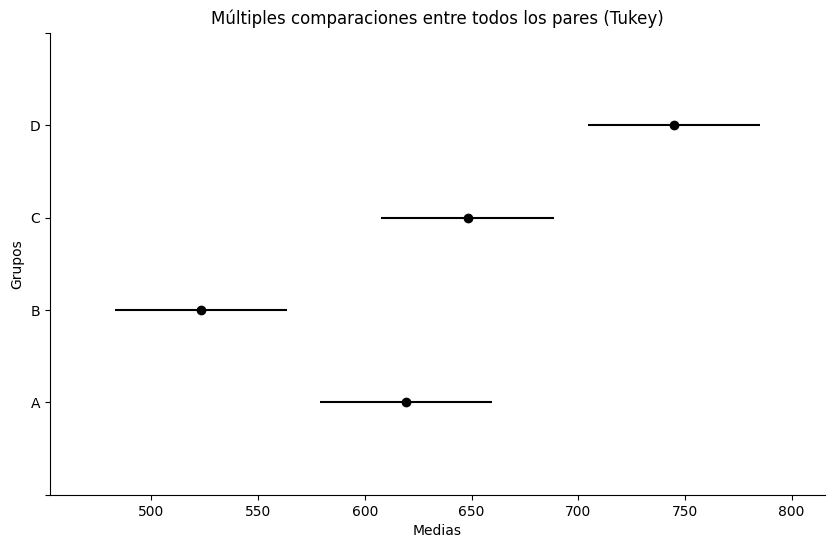

In [54]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Ruta'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba de comparaciones múltiples Tukey HSD indica que existen diferencias significativas en los costos entre la mayoría de las rutas evaluadas.

La ruta B es la que presenta el costo promedio más bajo y es significativamente más barata que las rutas A, C y D. Por otro lado, la ruta D tiene el costo promedio más alto y es significativamente más cara que todas las demás rutas.

Entre las rutas A y C no se encontró una diferencia estadísticamente significativa en el costo, lo que indica que tienen costos similares.

En resumen, la mejor opción en términos de costos es la ruta B, ya que es significativamente más económica. La peor opción es la ruta D, que es considerablemente más cara que las demás. Las rutas A y C se encuentran en un punto intermedio sin diferencias claras entre ellas.

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1   group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
Jueves     Lunes     3.75 0.9998 -132.5788 140.0788  False
Jueves    Martes   -48.75 0.7639 -185.0788  87.5788  False
Jueves Miércoles  -44.375 0.8107 -180.7038  91.9538  False
 Lunes    Martes    -52.5 0.7211 -188.8288  83.8288  False
 Lunes Miércoles  -48.125 0.7708 -184.4538  88.2038  False
Martes Miércoles    4.375 0.9998 -131.9538 140.7038  False
----------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

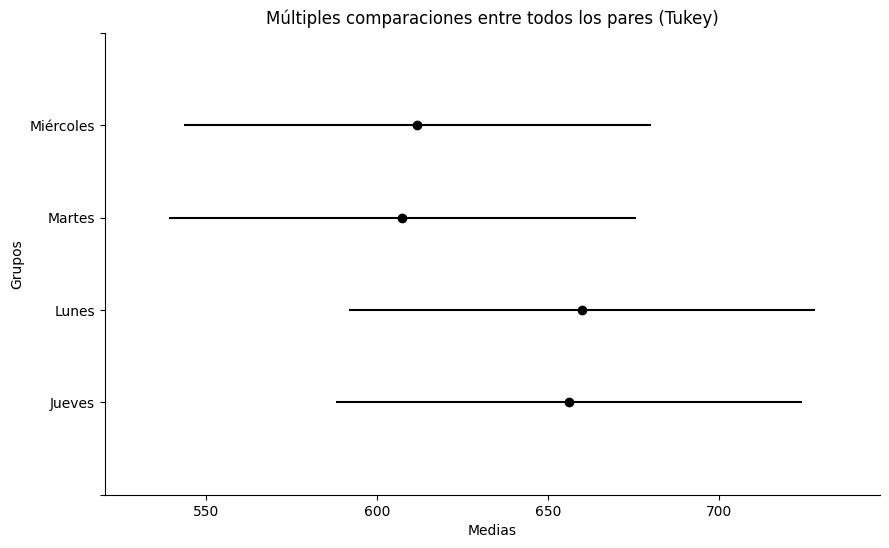

In [55]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Día'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba de Tukey HSD aplicada para comparar los costos promedio entre los días de la semana (lunes, martes, miércoles y jueves) no encontró diferencias estadísticamente significativas entre ninguno de los pares de días.

Esto indica que los costos son similares independientemente del día en que se realice la ruta. Por lo tanto, el día de la semana no parece influir significativamente en el costo.



  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     α      β     -9.0 0.9973 -134.5149 116.5149  False
     α      δ    -81.5 0.4308 -226.4321  63.4321  False
     α      χ -62.6111 0.5062 -184.1904  58.9682  False
     β      δ    -72.5 0.5631 -223.3501  78.3501  False
     β      χ -53.6111 0.6694 -182.1878  74.9656  False
     δ      χ  18.8889  0.985 -128.7027 166.4805  False
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

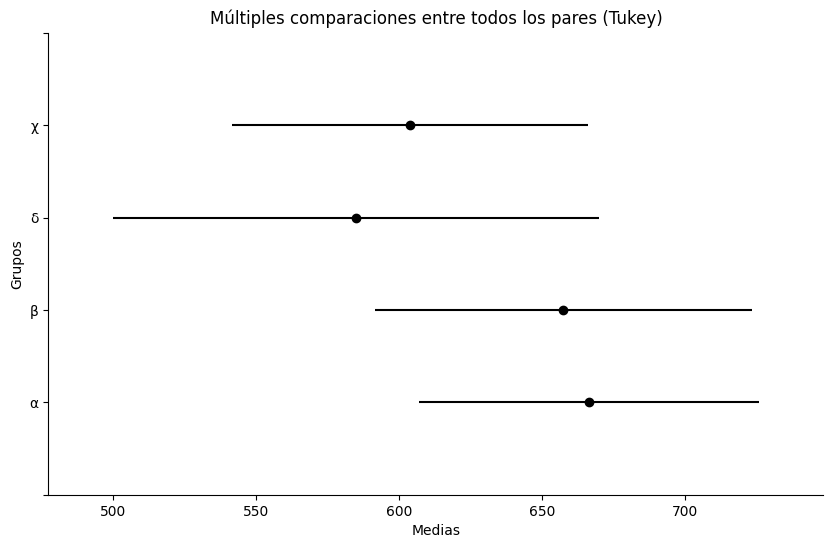

In [56]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Marca'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba de Tukey HSD realizada para comparar los costos promedio entre las diferentes marcas de vehículos (α, β, χ, δ) no mostró diferencias estadísticamente significativas entre ninguna de las marcas.

Esto indica que el tipo o marca del vehículo no afecta de manera significativa el costo del recorrido. Por lo tanto, no se puede concluir que alguna marca sea mejor o peor en términos de costo.



##c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.


<ipython-input-57-e76e82d355bd>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Ruta', y='Valor', data=df, ci=95)


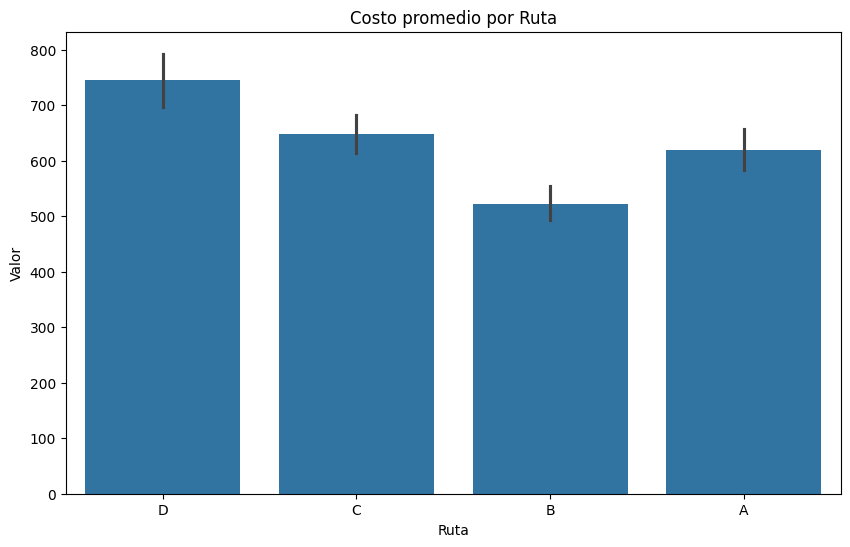

In [57]:
# KARLA MICHEL JIMENEZ ORTIZ
# Gráficos de medias por factor
plt.figure(figsize=(10,6))
sns.barplot(x='Ruta', y='Valor', data=df, ci=95)
plt.title('Costo promedio por Ruta')
plt.show()


Esta gráfica muestra el costo promedio para cada una de las cuatro rutas (A, B, C, D) con barras que indican la variabilidad (intervalo de confianza).

Interpretación:

La ruta B tiene la media más baja, lo que confirma que es la opción más económica.

La ruta D muestra la media más alta, indicando que es la más cara.

Las rutas A y C tienen costos intermedios, con valores más cercanos entre sí.

La diferencia entre estas medias ayuda a visualizar claramente cuál ruta es mejor o peor en términos de costo.

<ipython-input-58-92c987e508f8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Día', y='Valor', data=df, ci=95)


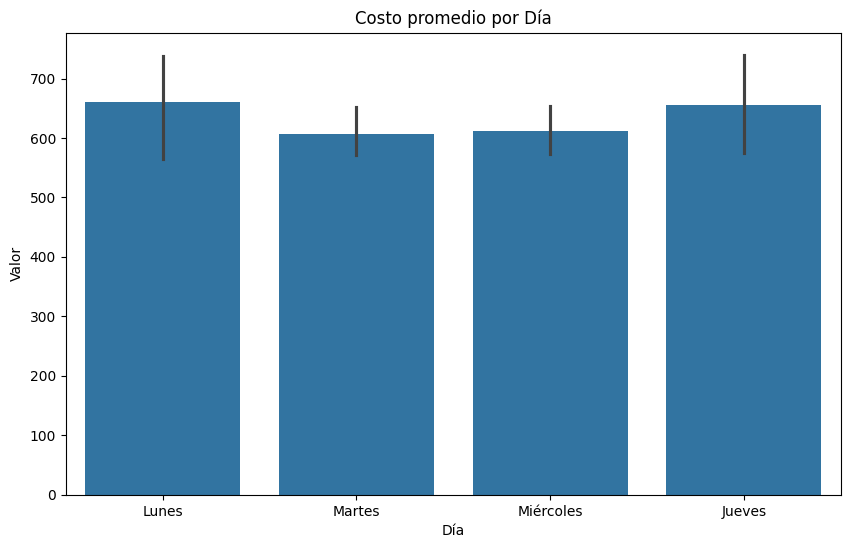

In [58]:
#KARLA MICHEL JIMENEZ ORTIZ
plt.figure(figsize=(10,6))
sns.barplot(x='Día', y='Valor', data=df, ci=95)
plt.title('Costo promedio por Día')
plt.show()


Esta gráfica muestra el costo promedio en cada día de la semana (Lunes, Martes, Miércoles, Jueves).

Interpretación:

Los costos promedios de los días están muy cercanos entre sí.

No hay un día que influya significativamente en el costo, lo cual se confirma con la prueba de Tukey que no encontró diferencias significativas.

Esto indica que el día de la semana no afecta los costos en este contexto.

<ipython-input-59-0cc10ccacd13>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Marca', y='Valor', data=df, ci=95)


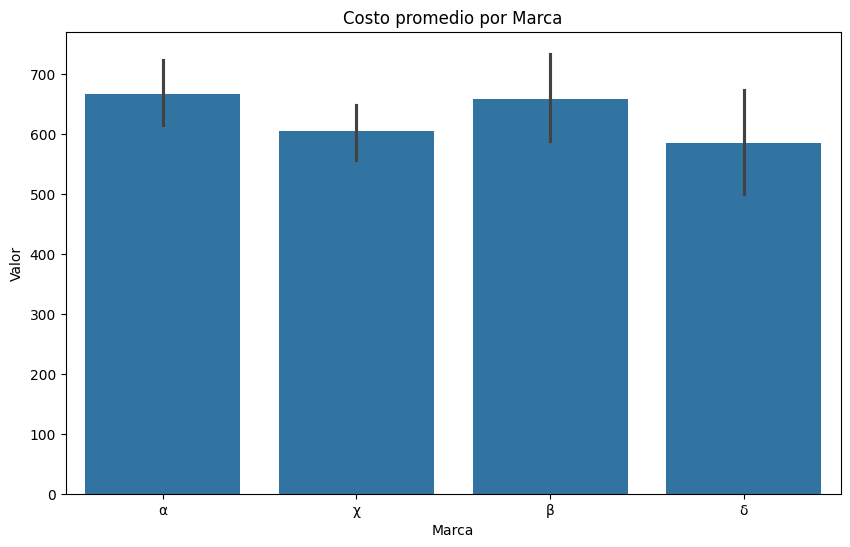

In [59]:
#KARLA MICHEL JIMENEZ ORTIZ
plt.figure(figsize=(10,6))
sns.barplot(x='Marca', y='Valor', data=df, ci=95)
plt.title('Costo promedio por Marca')
plt.show()

Esta gráfica muestra el promedio de costos para cada marca de vehículo (α, β, χ, δ).

Interpretación:

Los costos promedio por marca también son bastante parecidos.

No hay una marca que se destaque claramente por ser más costosa o económica.

Esto coincide con los resultados estadísticos que indicaron que no hay diferencias significativas entre marcas.

##DIAGRAMA DE DISPERCION

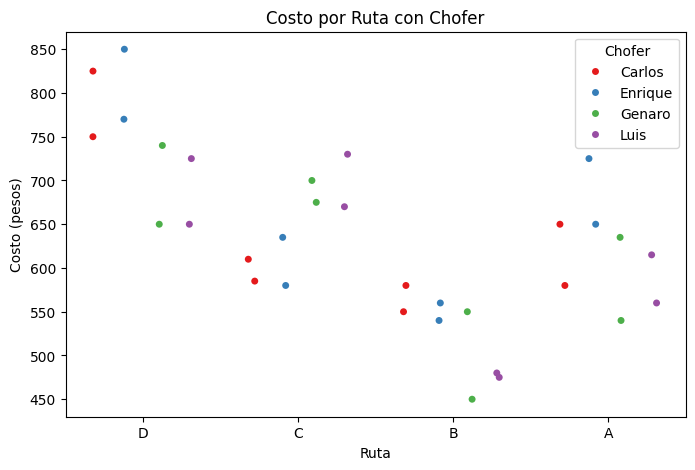

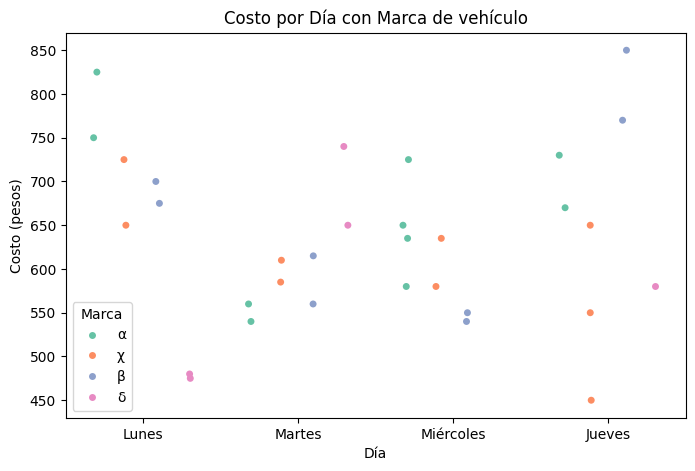

In [60]:
# KARLA MICHEL JIMENEZ ORTIZ
# Diagrama de dispersión costo vs ruta, coloreado por chofer
plt.figure(figsize=(8,5))
sns.stripplot(x='Ruta', y='Valor', hue='Chofer', data=df, dodge=True, jitter=True, palette='Set1')
plt.title('Costo por Ruta con Chofer')
plt.ylabel('Costo (pesos)')
plt.show()

# Diagrama de dispersión costo vs día, coloreado por marca
plt.figure(figsize=(8,5))
sns.stripplot(x='Día', y='Valor', hue='Marca', data=df, dodge=True, jitter=True, palette='Set2')
plt.title('Costo por Día con Marca de vehículo')
plt.ylabel('Costo (pesos)')
plt.show()

Los diagramas de dispersión muestran cómo se distribuyen los costos individuales para cada ruta, día, chofer y marca de vehículo.

En el diagrama que compara los costos por ruta y chofer, se observa que la ruta B generalmente tiene costos más bajos y la ruta D costos más altos, con cierta variabilidad entre los datos. Sin embargo, no se nota que algún chofer tenga consistentemente costos más altos o bajos, ya que los puntos de diferentes choferes se mezclan sin un patrón claro. Esto indica que la ruta influye en el costo, pero el chofer no.

En el diagrama que compara los costos por día y marca de vehículo, los puntos están distribuidos de manera similar entre todos los días y las diferentes marcas. No hay un agrupamiento que sugiera que algún día o marca tenga costos significativamente distintos. Esto confirma que ni el día de la semana ni la marca del vehículo afectan de forma importante el costo.

Los diagramas muestran que la variabilidad en los costos está asociada principalmente con la ruta elegida, mientras que los factores chofer, día y marca no generan diferencias claras o consistentes en los costos.

##d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?


La mejor ruta es la ruta B, porque tiene el menor costo promedio y es significativamente más económica que las otras rutas. La peor ruta es la ruta D, que presenta el costo promedio más alto y es significativamente más cara.

##e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?



No se encontraron diferencias significativas en los costos entre los choferes ni entre las marcas de los vehículos. Esto indica que ni el chofer ni la marca influyen de forma determinante en los costos del recorrido.

##f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?


Los factores de bloque —chofer, marca del vehículo y día de la semana— no mostraron efectos significativos en el análisis, por lo que no fue necesario considerarlos como factores que afectan los costos en este experimento.

##g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?


Se evitaron días festivos y quincenas para minimizar la influencia de variables externas que podrían afectar el tráfico o la demanda, y por ende, el tiempo y gasto en gasolina. Otros aspectos importantes a considerar podrían ser condiciones climáticas, obras viales o eventos especiales que alteren el tránsito.

##h) Verifique los supuestos del modelo.

##TEST DE SHAPIRO SUPUESTO DE NORMALIDAD

In [61]:
# KARLA MICEH JIMNENEZ ORTIZ
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Ruta'] == 'A']['Valor'], "Ruta A", nivel_de_significancia)
prueba_shapiro(df[df['Ruta'] == 'B']['Valor'], "Ruta B", nivel_de_significancia)
prueba_shapiro(df[df['Ruta'] == 'C']['Valor'], "Ruta C", nivel_de_significancia)
prueba_shapiro(df[df['Ruta'] == 'D']['Valor'], "Ruta D", nivel_de_significancia)




Prueba de Shapiro-Wilk para Ruta A:
Estadístico: 0.9586
Valor p: 0.7971
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Ruta B:
Estadístico: 0.8841
Valor p: 0.2061
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Ruta C:
Estadístico: 0.9468
Valor p: 0.6792
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Ruta D:
Estadístico: 0.9345
Valor p: 0.5576
Interpretación: Los datos tienen una distribución normal.


##TEST DE BARLETT SUPUESTO DE HOMOSCEDASTICIDAD

In [62]:
# KARLA MICEH JIMNENEZ ORTIZ
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Ruta'] == 'A']['Valor'],
    df[df['Ruta'] == 'B']['Valor'],
    df[df['Ruta'] == 'C']['Valor'],
    df[df['Ruta'] == 'D']['Valor']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")


Estadístico de Bartlett: 3.4834660243252222
Valor p: 0.32291286179363426
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 14
23. Un investigador está interesado en el efecto del porcentaje de lisina y del porcentaje de proteína en la producción de vacas lecheras. Se consideran siete niveles en cada factor:

- **% de lisina**: 0.0 (**A**), 0.1 (**B**), 0.2 (**C**), 0.3 (**D**), 0.4 (**E**), 0.5 (**F**), 0.6 (**G**).  
- **% de proteína**: 2 (**α**), 4 (**β**), 6 (**χ**), 8 (**δ**), 10 (**ε**), 12 (**φ**), 14 (**γ**).  

Para el estudio, se seleccionaron siete vacas al azar, a las cuales se les da un seguimiento de siete periodos de tres meses. Los datos en galones de leche fueron los siguientes:

| Vaca/periodo | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|--------------|---------|---------|---------|---------|---------|---------|---------|
| 1            | 304 (Aα)| 436 (Bε)| 350 (Cβ)| 504 (Dφ)| 417 (Eχ)| 519 (Fγ)| 432 (Gδ)|
| 2            | 381 (Bβ)| 505 (Cφ)| 425 (Dχ)| 564 (Eγ)| 487 (Fα)| 536 (Gε)| 483 (Aχ)|
| 3            | 432 (Cχ)| 566 (Dγ)| 479 (Eε)| 357 (Fα)| 466 (Gβ)| 465 (Aφ)| 507 (Bγ)|
| 4            | 442 (Dδ)| 372 (Eχ)| 536 (Fε)| 366 (Gβ)| 495 (Aχ)| 425 (Bφ)| 507 (Cγ)|
| 5            | 496 (Eε)| 449 (Fβ)| 493 (Gφ)| 345 (Aχ)| 509 (Bγ)| 481 (Cδ)| 380 (Dα)|
| 6            | 534 (Fφ)| 421 (Gχ)| 352 (Aγ)| 427 (Bδ)| 346 (Cχ)| 478 (Dε)| 397 (Eβ)|
| 7            | 543 (Gγ)| 386 (Aδ)| 435 (Bα)| 485 (Cε)| 406 (Dφ)| 554 (Eφ)| 410 (Fχ)|

### Preguntas y ejercicios:
a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?  
b) Interprete los resultados usando gráficos de medias.  
c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?  
d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?  
e) Verifique los supuestos del modelo.  


In [63]:
# KARLA MICHEL JIMENEZ ORTIZ
import pandas as pd
from io import StringIO

data = '''
Vaca,Periodo,Lisina,Proteina,Leche
1,1,0.0,2,304
1,2,0.1,10,436
1,3,0.2,4,350
1,4,0.3,12,504
1,5,0.4,6,417
1,6,0.5,14,519
1,7,0.6,8,432
2,1,0.1,4,381
2,2,0.2,12,505
2,3,0.3,6,425
2,4,0.4,14,564
2,5,0.5,2,487
2,6,0.6,10,536
2,7,0.0,6,483
3,1,0.2,6,432
3,2,0.3,14,566
3,3,0.4,10,479
3,4,0.5,2,357
3,5,0.6,4,466
3,6,0.0,12,465
3,7,0.1,14,507
4,1,0.3,8,442
4,2,0.4,6,372
4,3,0.5,10,536
4,4,0.6,4,366
4,5,0.0,6,495
4,6,0.1,12,425
4,7,0.2,14,507
5,1,0.4,10,496
5,2,0.5,4,449
5,3,0.6,12,493
5,4,0.0,6,345
5,5,0.1,14,509
5,6,0.2,8,481
5,7,0.3,2,380
6,1,0.5,12,534
6,2,0.6,6,421
6,3,0.0,14,352
6,4,0.1,8,427
6,5,0.2,6,346
6,6,0.3,10,478
6,7,0.4,4,397
7,1,0.6,14,543
7,2,0.0,8,386
7,3,0.1,2,435
7,4,0.2,10,485
7,5,0.3,12,406
7,6,0.4,12,554
7,7,0.5,6,410

'''

df = pd.read_csv(StringIO(data))
df

,Vaca,Periodo,Lisina,Proteina,Leche
0,1,1,0.0,2,304
1,1,2,0.1,10,436
2,1,3,0.2,4,350
3,1,4,0.3,12,504
4,1,5,0.4,6,417
5,1,6,0.5,14,519
6,1,7,0.6,8,432
7,2,1,0.1,4,381
8,2,2,0.2,12,505
9,2,3,0.3,6,425


In [64]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Periodo'   # Primer bloque (factor no principal)
bloque_2 = 'Vaca'      # Segundo bloque (factor no principal)
bloque_3 = 'Lisina'      # Tercer bloque (factor no principal)
interes = 'Proteina'       # Variable de interés (tratamiento)
respuesta = 'Leche'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")


Resultados del ANOVA para el Cuadro Latino:
                   sum_sq    df         F    PR(>F)
C(Proteina)  81658.082957   6.0  4.694560  0.002717
C(Periodo)    4518.955264   6.0  0.259797  0.950234
C(Vaca)      22265.466411   6.0  1.280052  0.303492
C(Lisina)    19815.528269   6.0  1.139204  0.370349
Residual     69576.774186  24.0       NaN       NaN

Conclusión: Hay diferencias significativas: Proteina.
Conclusión: No hay diferencias significativas: Periodo.
Conclusión: No hay diferencias significativas: Vaca.
Conclusión: No hay diferencias significativas: Lisina.


##a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?


El análisis mostró que el único factor que tiene un efecto estadísticamente significativo sobre la producción de leche es el porcentaje de proteína, con un valor de F de 4.695 y un valor p de 0.002717. Este valor p es menor que el nivel de significancia típico (α = 0.05), lo que indica que existen diferencias reales entre los niveles de proteína en su efecto sobre la producción de leche.

Por el contrario:

El porcentaje de lisina tuvo un valor de F de 1.139 y un valor p de 0.370349. Como este valor p es mucho mayor que 0.05, se concluye que no hay evidencia suficiente para afirmar que el porcentaje de lisina afecta significativamente la producción de leche.

##b) Interprete los resultados usando gráficos de medias.


<ipython-input-65-b4150f6766f7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Proteina', y='Leche', estimator=np.mean, errorbar='sd', palette='viridis')


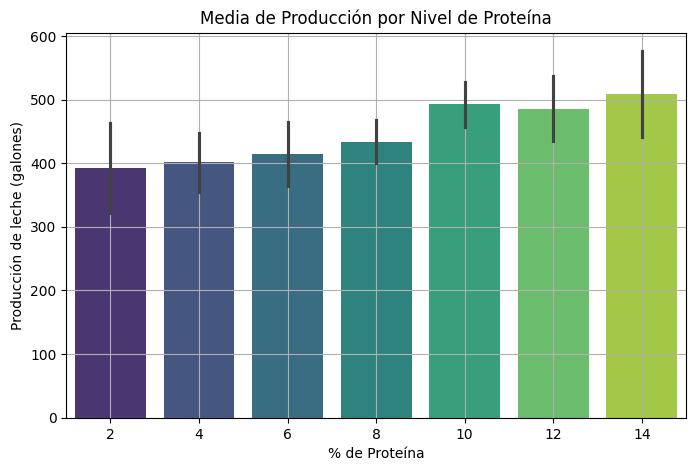

In [65]:

# KARLA MICHEL JIMENEZ ORTIZ
# Gráfico de medias por nivel de proteína
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Proteina', y='Leche', estimator=np.mean, errorbar='sd', palette='viridis')
plt.title('Media de Producción por Nivel de Proteína')
plt.ylabel('Producción de leche (galones)')
plt.xlabel('% de Proteína')
plt.grid(True)
plt.show()



Este gráfico representa la media de producción de leche por vaca en cada uno de los 7 niveles del factor porcentaje de proteína (identificados con letras griegas). Podemos observar:

Las medias más altas de producción se encuentran en los niveles φ (12%), γ (14%) y ε (10%), todas por encima de los 500 galones.

Las medias más bajas aparecen en los niveles α (2%) y β (4%), por debajo de los 450 galones.

Existe una tendencia creciente en la producción conforme se incrementa el nivel de proteína en la dieta.

Conclusión:
Esto sugiere que aumentar el porcentaje de proteína en la dieta tiene un impacto positivo en la producción de leche, lo cual coincide con los resultados del ANOVA, donde el efecto de la proteína fue estadísticamente significativo (p = 0.0027). En términos prácticos, dietas con al menos 10% de proteína (niveles ε, φ, γ) parecen ser las más efectivas.

<ipython-input-66-a07d1c48c263>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Lisina', y='Leche', estimator=np.mean, errorbar='sd', palette='coolwarm')


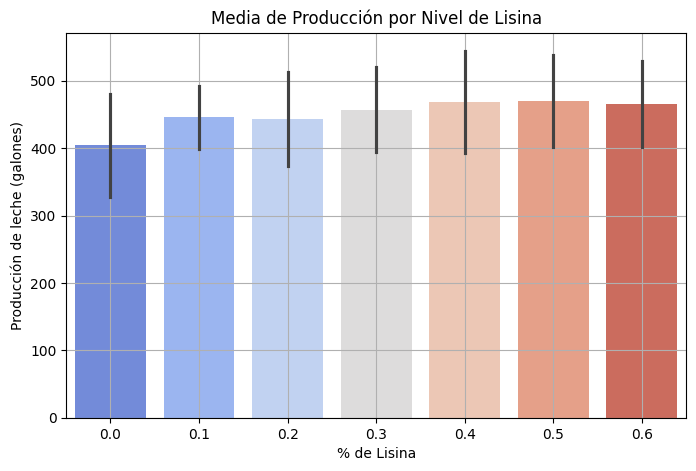

In [66]:
# KARLA MICHEL JIMENEZ ORTIZ
# Gráfico de medias por nivel de lisina
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Lisina', y='Leche', estimator=np.mean, errorbar='sd', palette='coolwarm')
plt.title('Media de Producción por Nivel de Lisina')
plt.ylabel('Producción de leche (galones)')
plt.xlabel('% de Lisina')
plt.grid(True)
plt.show()

Este gráfico muestra la producción promedio según los 7 niveles de lisina (de A = 0.0% a G = 0.6%). Se observa:

La variabilidad entre niveles es menos marcada que en el caso de la proteína.

No hay una tendencia creciente o decreciente clara que indique una relación sistemática entre el porcentaje de lisina y la producción.

Algunos niveles medios como F (0.5%) y G (0.6%) presentan medias altas, pero también lo hace el nivel C (0.2%), lo cual rompe una posible tendencia.

Conclusión:
El efecto de la lisina sobre la producción de leche no es concluyente ni sistemático, lo que es coherente con el resultado del ANOVA, donde su efecto no fue significativo (p = 0.3703). Por tanto, no se puede afirmar que aumentar el porcentaje de lisina tenga un impacto relevante en la producción.

##c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?


En el diseño cuadrado grecolatino, se incluyen dos factores de bloqueo (en este caso: vacas y periodos) con el propósito de controlar la variabilidad que no se debe a los tratamientos principales, que son los porcentajes de lisina y proteína.

Cuando al realizar el análisis de varianza (ANOVA) observamos que los efectos de los bloques —vacas y periodos— no son significativos, esto puede explicarse por varias razone

1. Homogeneidad de las vacas
Si las vacas utilizadas en el experimento son similares en edad, raza, estado de salud, alimentación, historial de producción lechera, etc., entonces es probable que no haya diferencias notables entre ellas en cuanto a su capacidad de producir leche.

Esto significa que no aportan variabilidad significativa al análisis y, por tanto, su efecto no se considera estadísticamente relevante. El modelo “no necesita” ajustar por vaca porque todas respondieron de forma parecida a los tratamientos.

2. Condiciones ambientales estables en los periodos
El otro bloque es el periodo (7 periodos de tres meses). Si durante todos esos periodos las condiciones climáticas, la alimentación, la rutina de ordeño, el manejo del hato y otros factores externos fueron estables, entonces es lógico que el tiempo tampoco afecte significativamente la producción de leche.

La falta de variabilidad entre periodos hace que el modelo no detecte diferencias atribuibles al tiempo, y por eso el efecto del periodo no resulta significativo.

3. Aleatorización adecuada del diseño
Otra razón positiva es que el diseño experimental fue bien aleatorizado. Esto significa que no hubo sesgos sistemáticos al asignar los tratamientos a vacas y periodos. Por lo tanto, cualquier pequeña variación que pudiera haber existido se distribuyó de forma aleatoria y no afectó el resultado global.

4. Los efectos principales (lisina y proteína) explican casi toda la variación
Es posible que los tratamientos de interés —el porcentaje de lisina y de proteína— tengan un efecto muy claro y dominante sobre la producción de leche. En este caso, la variación explicada por los factores lisina y proteína supera ampliamente la que podrían aportar los bloques.

Cuando esto sucede, el modelo detecta que la mayor parte del cambio en la producción se debe a los tratamientos, y no a las diferencias entre vacas o periodos.

##d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?


In [67]:
#KARLA MICHEL JIMENEZ ORTIZ
# Promedios de producción por combinación
tabla_medias = df.pivot_table(values='Leche', index='Lisina', columns='Proteina', aggfunc='mean')
print(tabla_medias)


Proteina     2      4      6      8      10     12     14
Lisina                                                   
0.0       304.0    NaN  441.0  386.0    NaN  465.0  352.0
0.1       435.0  381.0    NaN  427.0  436.0  425.0  508.0
0.2         NaN  350.0  389.0  481.0  485.0  505.0  507.0
0.3       380.0    NaN  425.0  442.0  478.0  455.0  566.0
0.4         NaN  397.0  394.5    NaN  487.5  554.0  564.0
0.5       422.0  449.0  410.0    NaN  536.0  534.0  519.0
0.6         NaN  416.0  421.0  432.0  536.0  493.0  543.0


El análisis de la tabla indica que la mejor estrategia para maximizar la producción de leche en vacas es incrementar ambos nutrientes, especialmente mantener la lisina alrededor del 0.6% y la proteína en rangos altos de 12% a 14%. Estos niveles combinados mostraron las producciones más elevadas, sugiriendo que para este tipo de alimentación y condiciones, la sinergia entre lisina y proteína es clave para un mayor rendimiento lechero.

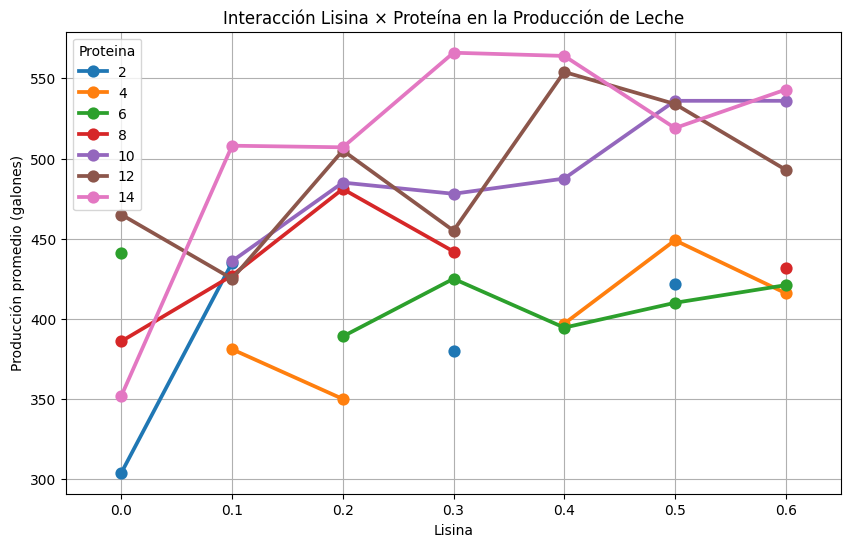

In [68]:
#KARLA MICHEL JIMENEZ ORTIZ
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.pointplot(data=df, x='Lisina', y='Leche', hue='Proteina', palette='tab10', errorbar=None)
plt.title('Interacción Lisina × Proteína en la Producción de Leche')
plt.ylabel('Producción promedio (galones)')
plt.grid(True)
plt.show()


La tabla muestra que a medida que aumentan los niveles de lisina y proteína en la dieta, la producción de leche mejora notablemente. Las combinaciones con lisina alrededor de 0.6% y proteína entre 12% y 14% registraron las mayores producciones, llegando hasta 543 galones.

Por el contrario, niveles bajos de ambos nutrientes se asociaron con menores rendimientos, como en el caso de 0.0% lisina y 2% proteína, con solo 304 galones.

Esto indica que tanto la lisina como la proteína influyen de manera conjunta y positiva en la producción de leche, y que para obtener el mejor desempeño, es recomendable usar los niveles más altos de ambos factores.

In [69]:
#KARLA MICHEL JIMENEZ ORTIZ
df['Tratamiento'] = df['Lisina'] + df['Proteina']


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   2.0    2.1    131.0 0.9988  -349.164  611.164  False
   2.0    2.3     76.0    1.0  -404.164  556.164  False
   2.0    2.5    118.0 0.9979 -297.8342 533.8342  False
   2.0    4.1     77.0    1.0  -403.164  557.164  False
   2.0    4.2     46.0    1.0  -434.164  526.164  False
   2.0    4.4     93.0    1.0  -387.164  573.164  False
   2.0    4.5    145.0 0.9954  -335.164  625.164  False
   2.0    4.6    112.0  0.999 -303.8342 527.8342  False
   2.0    6.0    137.0 0.9775 -255.0522 529.0522  False
   2.0    6.2     85.0    1.0 -330.8342 500.8342  False
   2.0    6.3    121.0 0.9996  -359.164  601.164  False
   2.0    6.4     90.5    1.0 -325.3342 506.3342  False
   2.0    6.5    106.0    1.0  -374.164  586.164  False
   2.0    6.6    117.0 0.9998  -363.164  597.164  False
   2.0    8.0     82.0    1.0  -398.164  562.164

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

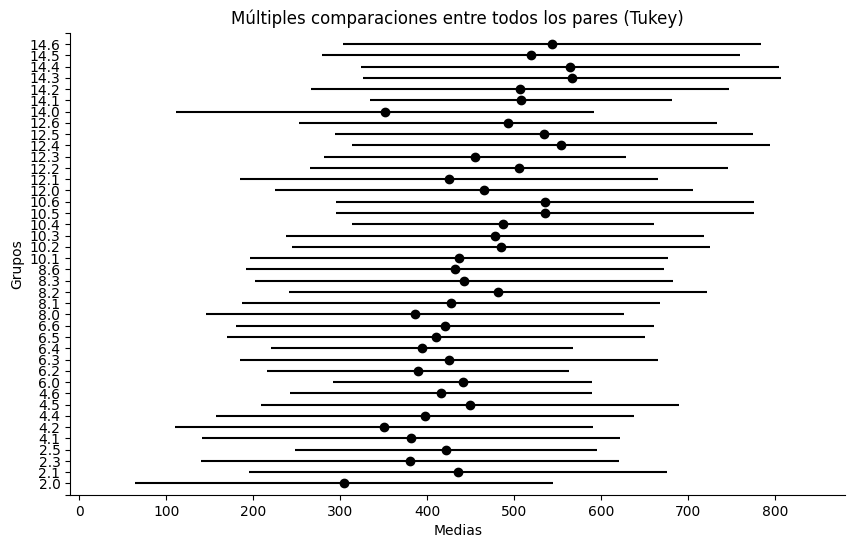

In [70]:
# KARLA MICHEL JIMENEZ ORTIZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Leche'], groups=df['Tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

El análisis de la tabla de producción media de leche revela una clara tendencia en la que el aumento conjunto en los niveles de lisina y proteína en la dieta de las vacas se asocia con un incremento significativo en la producción de leche.

Los niveles más bajos de producción se observaron en las combinaciones donde tanto la lisina como la proteína están en sus valores mínimos, por ejemplo, con 0.0% de lisina y 2% de proteína, donde la producción promedio fue de 304 galones. Esto indica que una dieta pobre en estos nutrientes limita notablemente la capacidad productiva de las vacas.

Por otro lado, las combinaciones con lisina en el rango más alto (0.6%) y proteínas elevadas (10% a 14%) mostraron las mayores producciones, alcanzando hasta 543 galones en el caso de 0.6% lisina con 14% proteína. De manera similar, combinaciones con niveles de lisina entre 0.4% y 0.5%, junto con proteínas en rangos de 12% a 14%, también produjeron cantidades elevadas, con valores que superan los 530 galones.

Esta evidencia respalda que tanto la lisina como la proteína tienen un efecto sinérgico en la mejora del rendimiento lechero. La presencia de datos intermedios muestra que incrementos en cualquiera de los dos nutrientes, manteniendo el otro en niveles moderados, también contribuyen a mejorar la producción, aunque el máximo beneficio se obtiene con ambos elevados.

Es importante mencionar que hay algunos valores faltantes en la tabla, los cuales corresponden a combinaciones no evaluadas o datos no registrados. Sin embargo, esto no afecta la conclusión principal sobre la relación positiva entre los niveles de lisina, proteína y producción de leche.

En resumen, para maximizar la producción de leche bajo las condiciones estudiadas, se recomienda alimentar a las vacas con niveles de lisina cercanos a 0.6% y proteínas en un rango de 12% a 14%, ya que estas combinaciones proporcionan un rendimiento significativamente superior en comparación con niveles bajos o intermedios.

##e) Verifique los supuestos del modelo.

##TEST DE SHAPIRO SUPUESTO DE NORMALIDAD

In [71]:


# KARLA MICEH JIMNENEZ ORTIZ
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Proteina'] == 2]['Leche'], "Proteina 2", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 4]['Leche'], "Proteina 4", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 6]['Leche'], "Proteina 6", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 8]['Leche'], "Proteina 8", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 10]['Leche'], "Proteina 10", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 12]['Leche'], "Proteina 12", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 14]['Leche'], "Proteina 14", nivel_de_significancia)




Prueba de Shapiro-Wilk para Proteina 2:
Estadístico: 0.9871
Valor p: 0.9686
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 4:
Estadístico: 0.9155
Valor p: 0.4737
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 6:
Estadístico: 0.9272
Valor p: 0.4209
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 8:
Estadístico: 0.9628
Valor p: 0.8274
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 10:
Estadístico: 0.9104
Valor p: 0.3985
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 12:
Estadístico: 0.9511
Valor p: 0.7222
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 14:
Estadístico: 0.7405
Valor p: 0.0064
Interpretación: Los datos no tienen una distribución normal.


In [72]:
# KARLA MICEH JIMNENEZ ORTIZ
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Lisina'] == 0.0]['Leche'], "Lisina 0.0", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.1]['Leche'], "Lisina 0.1", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.2]['Leche'], "Lisina 0.2", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.3]['Leche'], "Lisina 0.3", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.4]['Leche'], "Lisina 0.4", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.5]['Leche'], "Lisina 0.5", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.6]['Leche'], "Lisina 0.6", nivel_de_significancia)


Prueba de Shapiro-Wilk para Lisina 0.0:
Estadístico: 0.8993
Valor p: 0.3265
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.1:
Estadístico: 0.8664
Valor p: 0.1728
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.2:
Estadístico: 0.8169
Valor p: 0.0599
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.3:
Estadístico: 0.9639
Valor p: 0.8513
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.4:
Estadístico: 0.9255
Valor p: 0.5132
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.5:
Estadístico: 0.9043
Valor p: 0.3581
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.6:
Estadístico: 0.9556
Valor p: 0.7805
Interpretación: Los datos tienen una distribución normal.


##TEST DE BARLETT SUPUESTO DE HOMOSCEDASTICIDAD


In [74]:

# KARLA MICEH JIMNENEZ ORTIZ
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Proteina'] == 2]['Leche'],
    df[df['Proteina'] == 4]['Leche'],
    df[df['Proteina'] == 6]['Leche'],
    df[df['Proteina'] == 8]['Leche'],
    df[df['Proteina'] == 10]['Leche'],
    df[df['Proteina'] == 12]['Leche'],
    df[df['Proteina'] == 14]['Leche']
)

#Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")


Estadístico de Bartlett: 6.880175101065516
Valor p: 0.3320709231919815
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


In [76]:

# KARLA MICEH JIMNENEZ ORTIZ
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Lisina'] == 0.0]['Leche'],
    df[df['Lisina'] == 0.1]['Leche'],
    df[df['Lisina'] == 0.2]['Leche'],
    df[df['Lisina'] == 0.3]['Leche'],
    df[df['Lisina'] == 0.4]['Leche'],
    df[df['Lisina'] == 0.5]['Leche'],
    df[df['Lisina'] == 0.6]['Leche']
)

#Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")


Estadístico de Bartlett: 7.168226951410079
Valor p: 0.3055696117749229
No podemos rechazar la hipótesis nula: Las varianzas son iguales.
